In [1]:
import os  # Interact with the operating system (file handling, paths, etc.)
import gc  # Manages garbage collection (memory cleanup)
import PIL  # Image processing library (Pillow)
import cv2  # OpenCV for image processing and computer vision
import uuid  # Generate unique identifiers (used for unique filenames)
import shutil  # High-level file operations (copying, moving, deleting)
import random  # Generate random numbers, shuffle data, and sampling
import glob as gb  # Pattern-based file searching (e.g., "*.jpg" for all images)
import numpy as np  # Numerical computing with arrays and matrices
import pandas as pd  # Data handling with structured DataFrames
import tensorflow as tf  # Deep learning framework for building models
import matplotlib.pyplot as plt  # Data visualization (plots, graphs, image display)

from PIL import Image  # Handling and processing image files
from tqdm import tqdm  # Display progress bars for loops
from scipy.special import gamma  # Gamma function used in probability and statistics

import keras  # High-level neural network API within TensorFlow
from keras.optimizers import *  # Various optimizers (Adam, SGD, RMSprop, etc.)
from keras.regularizers import l1_l2  # Regularization techniques (L1/L2) to prevent overfitting
from keras.utils import to_categorical  # Converts class labels to one-hot encoding
from keras.callbacks import EarlyStopping  # Stops training early if validation loss increases
from keras.models import Sequential, Model  # Model architectures (Sequential = linear, Model = flexible)
from keras.layers import Dense, Dropout, Input  # Fully connected layers, dropout for regularization, input layer
from keras.layers import GlobalAveragePooling2D  # Replaces fully connected layers to reduce parameters
from keras.callbacks import LearningRateScheduler  # Dynamically adjust learning rate during training
from keras.layers import Conv2D, MaxPool2D, BatchNormalization  # CNN layers for feature extraction & normalization

from tensorflow.keras.metrics import *  # Model evaluation metrics (accuracy, precision, recall, etc.)
from tensorflow.keras.callbacks import *  # Various training callbacks (checkpointing, early stopping)
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Augments images (rotation, zoom, flip, etc.)

from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.utils import shuffle  # Shuffles data to prevent learning order biases

2025-07-15 10:39:40.620547: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752575980.645367      73 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752575980.652895      73 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
path = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset"

for files in os.listdir(path):
    files_dir = os.path.join(path, files)

    if files == 'jpeg':   # to pass 6774 files 
        pass
    else:
        for file in os.listdir(files_dir):
            print(file)

#Looping through each file/Folder and Ignore the folder named 'jpeg' and loop through the remaining files.dicom_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv")

dicom_info.csv
mass_case_description_train_set.csv
calc_case_description_train_set.csv
meta.csv
calc_case_description_test_set.csv
mass_case_description_test_set.csv


In [3]:
dicom_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv")

In [4]:
dicom_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [5]:
dicom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [6]:
dicom_df.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [7]:
dicom_df.SeriesDescription.value_counts()

SeriesDescription
cropped images           3567
ROI mask images          3247
full mammogram images    2857
Name: count, dtype: int64

In [8]:
matr_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv")
matr_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [9]:
matr_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [10]:
matr_df.describe().T

count      mean       std  min  25%  50%  75%  max
breast_density  1318.0  2.203338  0.873774  1.0  2.0  2.0  3.0  4.0
abnormality id  1318.0  1.116085  0.467013  1.0  1.0  1.0  1.0  6.0
assessment      1318.0  3.504552  1.414609  0.0  3.0  4.0  4.0  5.0
subtlety        1318.0  3.965857  1.102032  0.0  3.0  4.0  5.0  5.0

In [11]:
catr_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv")
catr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [12]:
catr_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [13]:
catr_df.describe().T

count      mean       std  min  25%  50%  75%  max
breast density  1546.0  2.663648  0.937219  1.0  2.0  3.0  3.0  4.0
abnormality id  1546.0  1.415265  0.903571  1.0  1.0  1.0  1.0  7.0
assessment      1546.0  3.258732  1.229231  0.0  2.0  4.0  4.0  5.0
subtlety        1546.0  3.411384  1.179754  1.0  3.0  3.0  4.0  5.0

In [14]:
mate_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv")
mate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               378 non-null    object
 1   breast_density           378 non-null    int64 
 2   left or right breast     378 non-null    object
 3   image view               378 non-null    object
 4   abnormality id           378 non-null    int64 
 5   abnormality type         378 non-null    object
 6   mass shape               378 non-null    object
 7   mass margins             361 non-null    object
 8   assessment               378 non-null    int64 
 9   pathology                378 non-null    object
 10  subtlety                 378 non-null    int64 
 11  image file path          378 non-null    object
 12  cropped image file path  378 non-null    object
 13  ROI mask file path       378 non-null    object
dtypes: int64(4), object(10)
memory usage: 41.5

In [15]:
mate_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality type mass shape   mass margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image file path  \
0  Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...   
3  Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...   
4  Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...   

                             cropped image file path  \
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....   
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....   

                                  ROI mask file path  
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....  
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....

In [16]:
mate_df.describe().T

count      mean       std  min  25%  50%  75%  max
breast_density  378.0  2.396825  0.859455  1.0  2.0  2.0  3.0  4.0
abnormality id  378.0  1.092593  0.398136  1.0  1.0  1.0  1.0  4.0
assessment      378.0  3.534392  1.343076  0.0  3.0  4.0  4.0  5.0
subtlety        378.0  3.785714  1.171776  1.0  3.0  4.0  5.0  5.0

In [17]:
cate_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv")
cate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

In [18]:
cate_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT        MLO               1   
2    P_00038               2                RIGHT         CC               1   
3    P_00038               2                RIGHT         CC               2   
4    P_00038               2                RIGHT        MLO               1   

  abnormality type             calc type calc distribution  assessment  \
0    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2    calcification              VASCULAR               NaN           2   
3    calcification              VASCULAR               NaN           2   
4    calcification              VASCULAR               NaN           2   

                 pathology  subtlety  \
0                   BENIGN         2   
1                   BENIGN         2   
2  BENIGN_WITHOUT_CALLBACK         5   
3  BENIGN_WITHOUT_CALLBACK         5   
4  BENIGN_WITHOUT_CALLBACK         5   

                                     image file path  \
0  Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
3  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
4  Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...   

                             cropped image file path  \
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....   
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....   
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...   

                                  ROI mask file path  
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....  
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....  
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...

In [19]:
cate_df.describe().T

count      mean       std  min  25%  50%  75%  max
breast density  326.0  2.696319  0.909667  0.0  2.0  3.0  3.0  4.0
abnormality id  326.0  1.214724  0.529061  1.0  1.0  1.0  1.0  5.0
assessment      326.0  3.453988  1.188159  0.0  2.0  4.0  4.0  5.0
subtlety        326.0  3.319018  1.188175  1.0  3.0  3.0  4.0  5.0

In [20]:
meta_df = pd.read_csv("/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/meta.csv")
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SeriesInstanceUID  6775 non-null   object
 1   StudyInstanceUID   6775 non-null   object
 2   Modality           6775 non-null   object
 3   SeriesDescription  6775 non-null   object
 4   BodyPartExamined   6775 non-null   object
 5   SeriesNumber       6775 non-null   int64 
 6   Collection         6775 non-null   object
 7   Visibility         6775 non-null   int64 
 8   ImageCount         6775 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 476.5+ KB


In [21]:
meta_df.head()

SeriesInstanceUID  \
0  1.3.6.1.4.1.9590.100.1.2.117041576511324414842...   
1  1.3.6.1.4.1.9590.100.1.2.438738396107617880132...   
2  1.3.6.1.4.1.9590.100.1.2.767416741131676463382...   
3  1.3.6.1.4.1.9590.100.1.2.296931352612305599800...   
4  1.3.6.1.4.1.9590.100.1.2.436657670120353100077...   

                                    StudyInstanceUID Modality  \
0  1.3.6.1.4.1.9590.100.1.2.229361142710768138411...       MG   
1  1.3.6.1.4.1.9590.100.1.2.195593486612988388325...       MG   
2  1.3.6.1.4.1.9590.100.1.2.257901172612530623323...       MG   
3  1.3.6.1.4.1.9590.100.1.2.109468616710242115222...       MG   
4  1.3.6.1.4.1.9590.100.1.2.380627129513562450304...       MG   

  SeriesDescription BodyPartExamined  SeriesNumber Collection  Visibility  \
0   ROI mask images           BREAST             1  CBIS-DDSM           1   
1   ROI mask images           BREAST             1  CBIS-DDSM           1   
2   ROI mask images           BREAST             1  CBIS-DDSM           1   
3   ROI mask images           BREAST             1  CBIS-DDSM           1   
4   ROI mask images           BREAST             1  CBIS-DDSM           1   

   ImageCount  
0           2  
1           2  
2           2  
3           2  
4           2

In [22]:
meta_df.describe().T

count      mean       std  min  25%  50%  75%  max
SeriesNumber  6775.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Visibility    6775.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
ImageCount    6775.0  1.511292  0.499909  1.0  1.0  2.0  2.0  2.0

In [23]:


cropped_images = dicom_df[dicom_df.SeriesDescription=="cropped images"].image_path
cropped_images.head()



0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [24]:
full_mammogram = dicom_df[dicom_df.SeriesDescription=="full mammogram images"].image_path
full_mammogram.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [25]:
roi_mask = dicom_df[dicom_df.SeriesDescription=="ROI mask images"].image_path
roi_mask.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [26]:
def replace_path(sample, old_path, new_path):
    return sample.replace(old_path, new_path, regex=True)

In [27]:


def plot_samples(sample, row=40, col=40):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:10]):
        cropped_images_show = PIL.Image.open(file)
        gray_img= cropped_images_show.convert("L")
        plt.subplot(1,10,i+1)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
    plt.show()



In [28]:
correct_dir = "../input/cbis-ddsm-breast-cancer-image-dataset/jpeg"

In [29]:
cropped_images = replace_path(cropped_images, "CBIS-DDSM/jpeg", correct_dir)

In [30]:
cropped_images = replace_path(cropped_images, "CBIS-DDSM/jpeg", correct_dir)

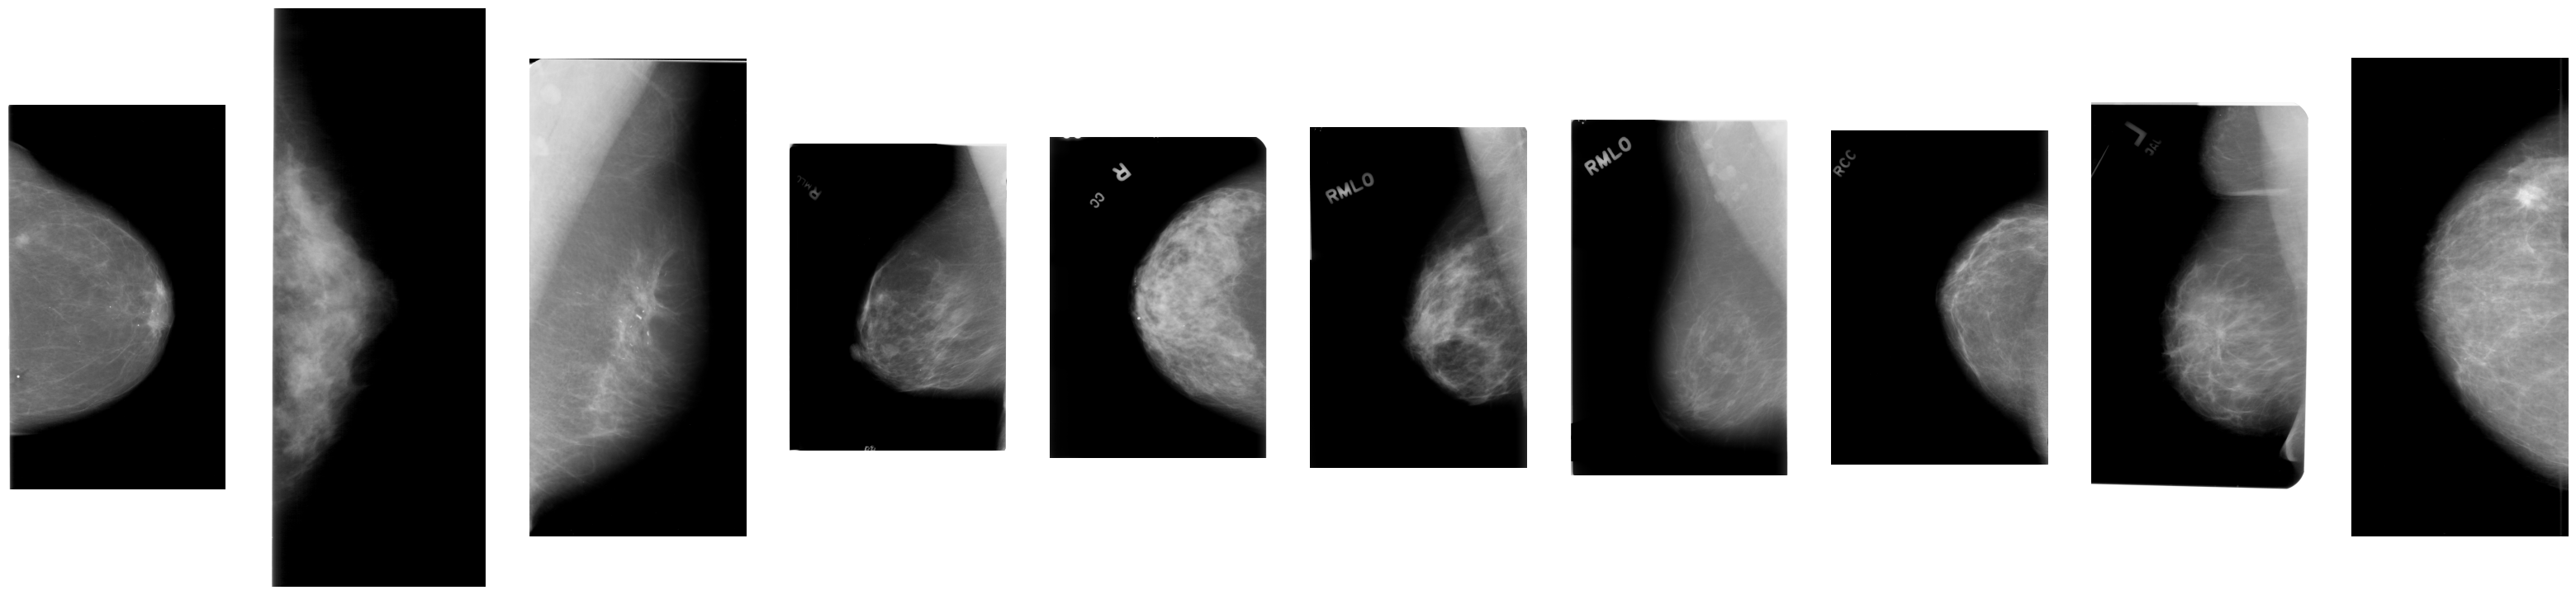

In [31]:
full_mammogram = replace_path(full_mammogram, "CBIS-DDSM/jpeg", correct_dir)
plot_samples(full_mammogram, 40,40)

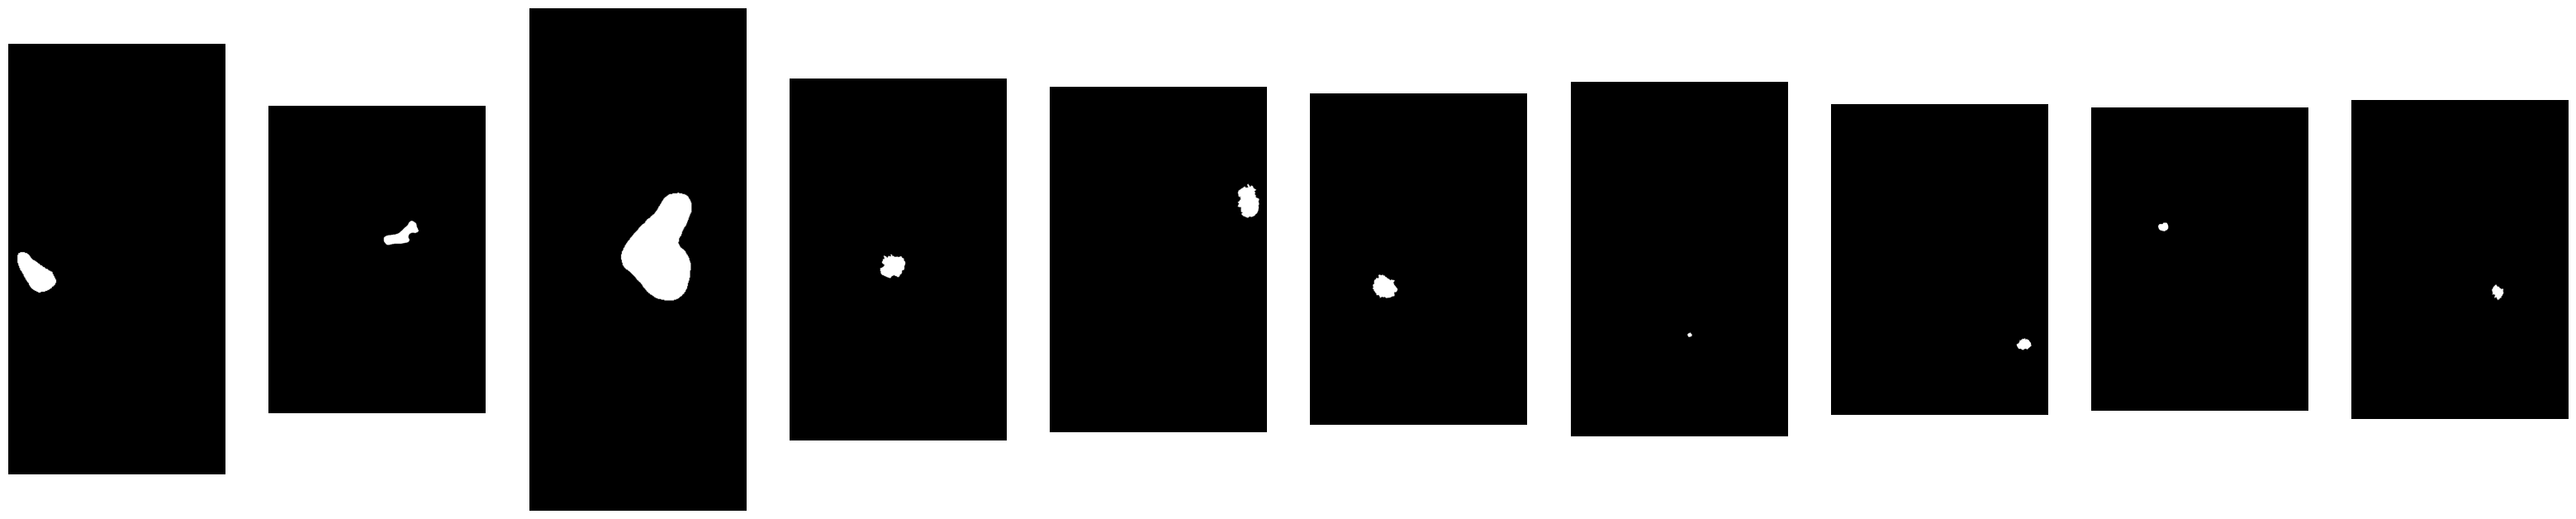

In [32]:
roi_mask = replace_path(roi_mask, "CBIS-DDSM/jpeg", correct_dir)
plot_samples(roi_mask, 40,40)

In [33]:
def get_image_file_name(data, new_dict):
    for dicom in data:
        key = dicom.split('/')[4]
        new_dict[key] = dicom
    print(f"the length of dataset ==> {len(new_dict.keys())}")

In [34]:
cropped_images_dict = dict()
full_mammo_dict = dict()
roi_img_dict = dict()

get_image_file_name(cropped_images, cropped_images_dict)
get_image_file_name(full_mammogram, full_mammo_dict)
get_image_file_name(roi_mask, roi_img_dict)

the length of dataset ==> 3567
the length of dataset ==> 2857
the length of dataset ==> 3247


In [35]:
def fix_image_path(data):
    for indx, image in enumerate(data.values):
        img_name = image[11].split('/')[2]
        if img_name in full_mammo_dict:
            data.iloc[indx, 11] = full_mammo_dict[img_name]
        else:
            data.iloc[indx, 11] = None
        img_name = image[12].split('/')[2]
        if img_name in cropped_images_dict:
            data.iloc[indx, 12] = cropped_images_dict[img_name]
        else:
            data.iloc[indx, 11] = None
        img_name = image[13].split('/')[2]
        if img_name in roi_img_dict:
            data.iloc[indx, 13] = roi_img_dict[img_name]
        else:
            data.iloc[indx, 13] = None

In [36]:
fix_image_path(matr_df)

In [37]:
matr_df = matr_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                        'image view': 'image_view',
                                        'abnormality id': 'abnormality_id',
                                        'abnormality type': 'abnormality_type',
                                        'mass shape': 'mass_shape',
                                        'mass margins': 'mass_margins',
                                        'image file path': 'image_file_path',
                                        'cropped image file path': 'cropped_image_file_path',
                                        'ROI mask file path': 'ROI_mask_file_path'})
matr_df.head(5)

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality_type                          mass_shape   mass_margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped_image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI_mask_file_path  
0  ../input/cbis-ddsm-breast-cancer-image-dataset...  
1  ../input/cbis-ddsm-breast-cancer-image-dataset...  
2  ../input/cbis-ddsm-breast-cancer-image-dataset...  
3  ../input/cbis-ddsm-breast-cancer-image-dataset...  
4  ../input/cbis-ddsm-breast-cancer-image-dataset...

In [38]:
matr_df.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [39]:
fix_image_path(mate_df)

In [40]:
mate_df= mate_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})
mate_df.head()

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality_type mass_shape   mass_margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped_image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI_mask_file_path  
0  ../input/cbis-ddsm-breast-cancer-image-dataset...  
1  ../input/cbis-ddsm-breast-cancer-image-dataset...  
2  ../input/cbis-ddsm-breast-cancer-image-dataset...  
3  ../input/cbis-ddsm-breast-cancer-image-dataset...  
4  ../input/cbis-ddsm-breast-cancer-image-dataset...

In [41]:
fix_image_path(catr_df)

In [42]:
catr_df= catr_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})
catr_df.head()

patient_id  breast density left_or_right_breast image_view  abnormality_id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality_type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped_image_file_path  \
0  ../input/cbis-ddsm-breast-cancer-image-dataset...   
1  ../input/cbis-ddsm-breast-cancer-image-dataset...   
2  ../input/cbis-ddsm-breast-cancer-image-dataset...   
3  ../input/cbis-ddsm-breast-cancer-image-dataset...   
4  ../input/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI_mask_file_path  
0  ../input/cbis-ddsm-breast-cancer-image-dataset...  
1  ../input/cbis-ddsm-breast-cancer-image-dataset...  
2  ../input/cbis-ddsm-breast-cancer-image-dataset...  
3  ../input/cbis-ddsm-breast-cancer-image-dataset...  
4  ../input/cbis-ddsm-breast-cancer-image-dataset...

In [43]:
fix_image_path(cate_df)

In [44]:
cate_df = cate_df.rename(columns={'left or right breast': 'left_or_right_breast',
                                      'image view': 'image_view',
                                      'abnormality id': 'abnormality_id',
                                      'abnormality type': 'abnormality_type',
                                      'mass shape': 'mass_shape',
                                      'mass margins': 'mass_margins',
                                      'image file path': 'image_file_path',
                                      'cropped image file path': 'cropped_image_file_path',
                                      'ROI mask file path': 'ROI_mask_file_path'})
cate_df.head()

patient_id  breast density left_or_right_breast image_view  abnormality_id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT        MLO               1   
2    P_00038               2                RIGHT         CC               1   
3    P_00038               2                RIGHT         CC               2   
4    P_00038               2                RIGHT        MLO               1   

  abnormality_type             calc type calc distribution  assessment  \
0    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2    calcification              VASCULAR               NaN           2   
3    calcification              VASCULAR               NaN           2   
4    calcification              VASCULAR               NaN           2   

                 pathology  subtlety image_file_path  \
0                   BENIGN         2            None   
1                   BENIGN         2            None   
2  BENIGN_WITHOUT_CALLBACK         5            None   
3  BENIGN_WITHOUT_CALLBACK         5            None   
4  BENIGN_WITHOUT_CALLBACK         5            None   

                             cropped_image_file_path ROI_mask_file_path  
0  ../input/cbis-ddsm-breast-cancer-image-dataset...               None  
1  ../input/cbis-ddsm-breast-cancer-image-dataset...               None  
2  ../input/cbis-ddsm-breast-cancer-image-dataset...               None  
3  ../input/cbis-ddsm-breast-cancer-image-dataset...               None  
4  ../input/cbis-ddsm-breast-cancer-image-dataset...               None

In [45]:
def display_images(dataset, column, number):
    fig, axes = plt.subplots(1, number, figsize=(15, 5))
    for index, (i, row) in enumerate(dataset.head(number).iterrows()):
        image_path = row[column]
        if image_path is None or not os.path.exists(image_path):
            continue
        
        image = cv2.imread(image_path)
        
        if image is None:
            continue
        if len(image.shape) == 3 and image.shape[2] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        ax = axes[index]
        ax.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
        print(np.array(image).shape)
    
    plt.tight_layout()
    plt.show()

Full Mammograms:

(4808, 3024, 3)
(4800, 2656, 3)
(5491, 2986, 3)
(5491, 3046, 3)
(5491, 2911, 3)


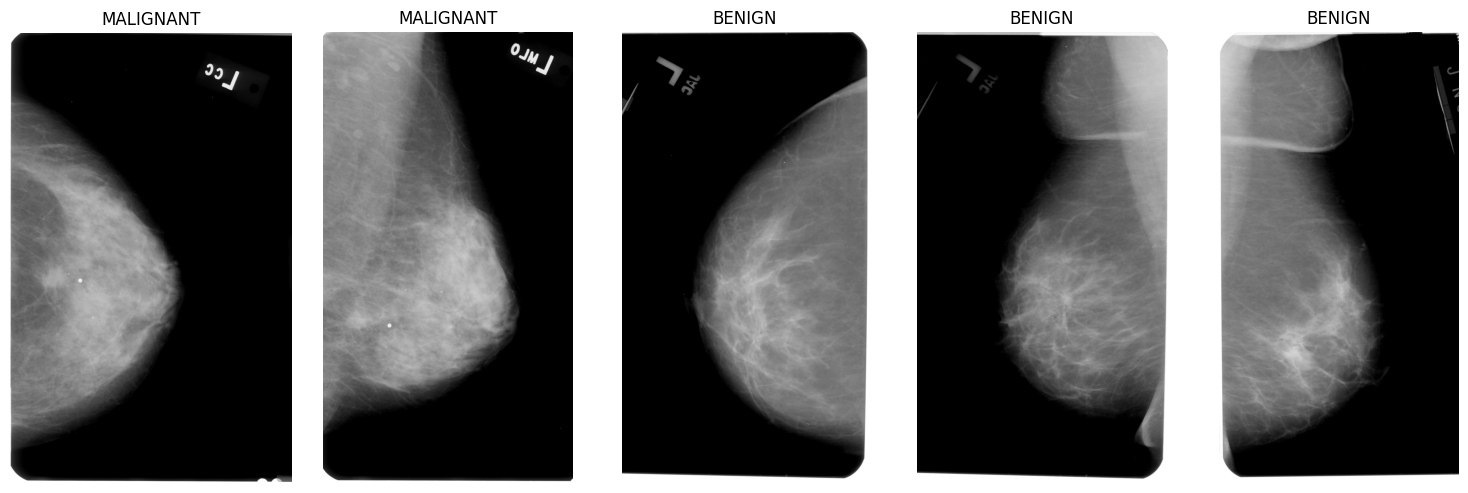

Cropped Mammograms:

(515, 431, 3)
(292, 256, 3)
(466, 423, 3)
(427, 422, 3)
(399, 465, 3)


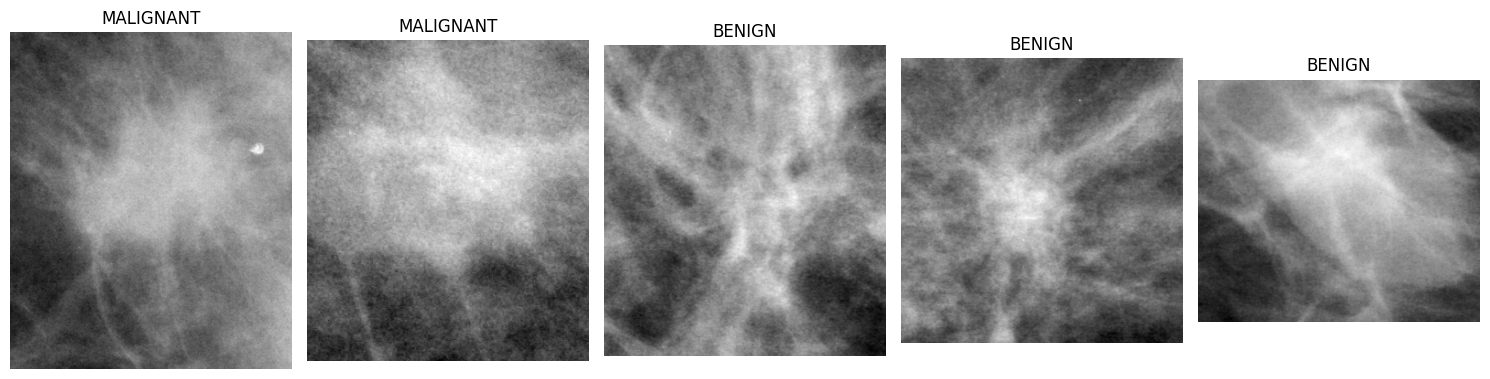

ROI_mask:

(4808, 3024, 3)
(4800, 2656, 3)
(5491, 2986, 3)
(5491, 3046, 3)
(5491, 2911, 3)


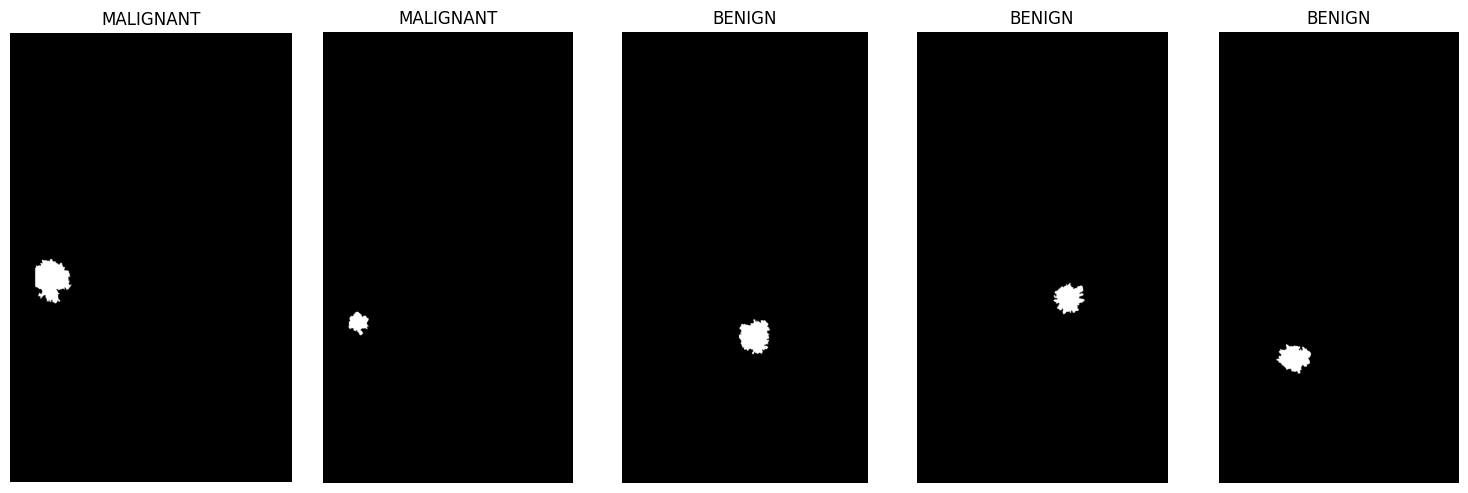

In [46]:
print('Full Mammograms:\n')
display_images(matr_df, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(matr_df, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(matr_df, 'ROI_mask_file_path', 5)

Full Mammograms:

(4006, 1846, 3)
(5491, 2011, 3)
(5904, 3200, 3)
(5952, 3352, 3)
(5116, 2641, 3)


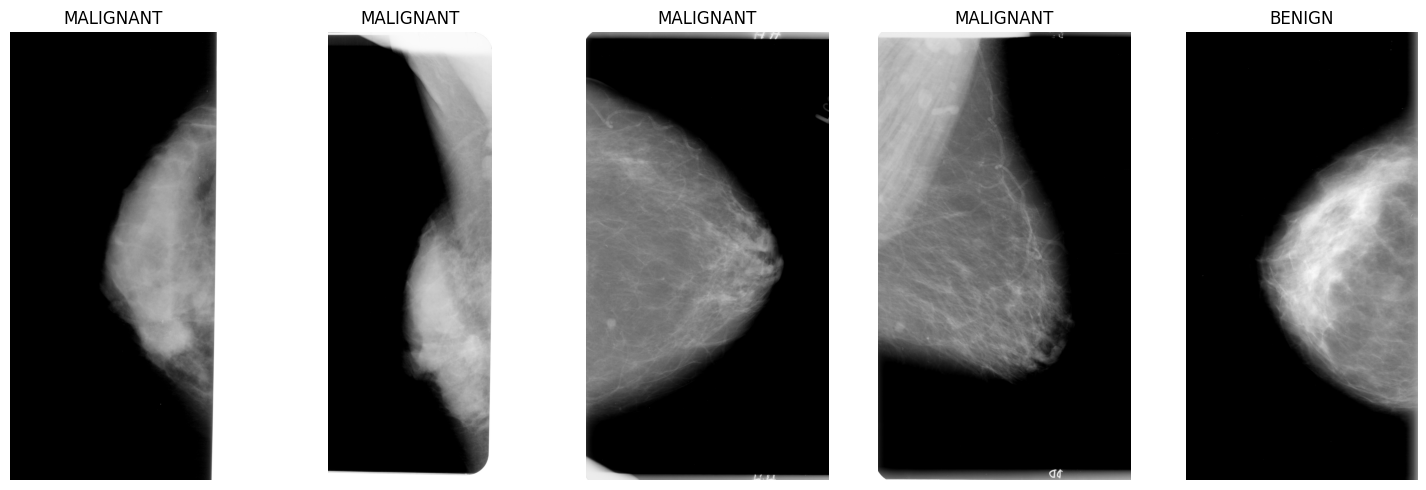

Cropped Mammograms:

(384, 385, 3)
(369, 328, 3)
(214, 195, 3)
(220, 225, 3)
(405, 376, 3)


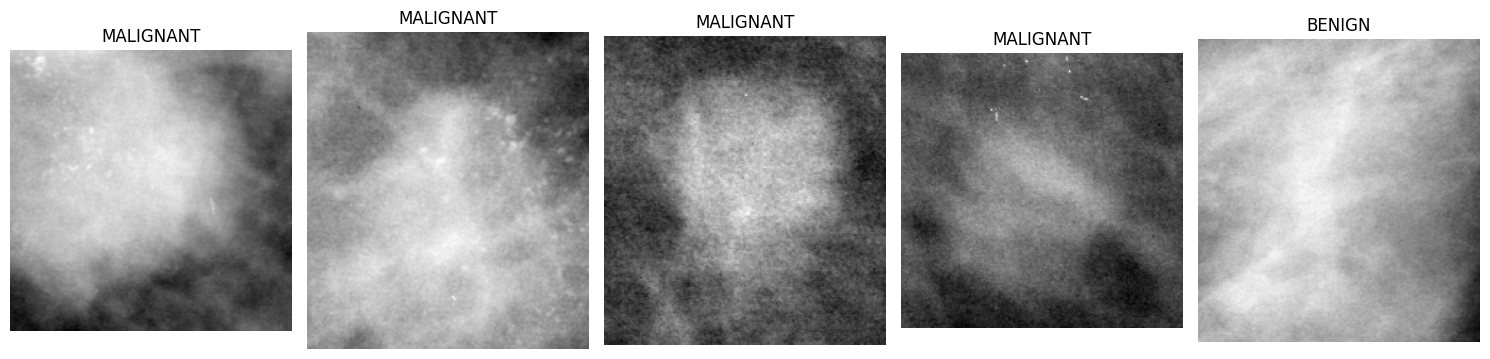

ROI_mask:

(4006, 1846, 3)
(5491, 2011, 3)
(5904, 3200, 3)
(5952, 3352, 3)
(5116, 2641, 3)


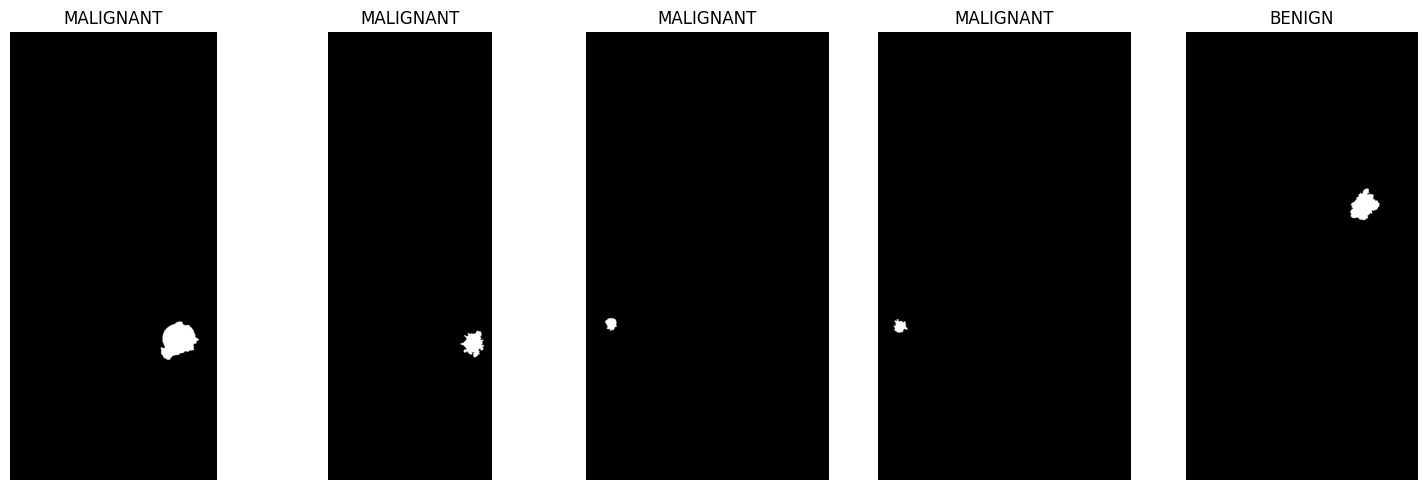

In [47]:
print('Full Mammograms:\n')
display_images(mate_df, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(mate_df, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(mate_df, 'ROI_mask_file_path', 5)

Full Mammograms:

(5056, 2761, 3)
(5386, 2836, 3)
(5356, 2986, 3)
(5491, 3166, 3)
(4568, 3064, 3)


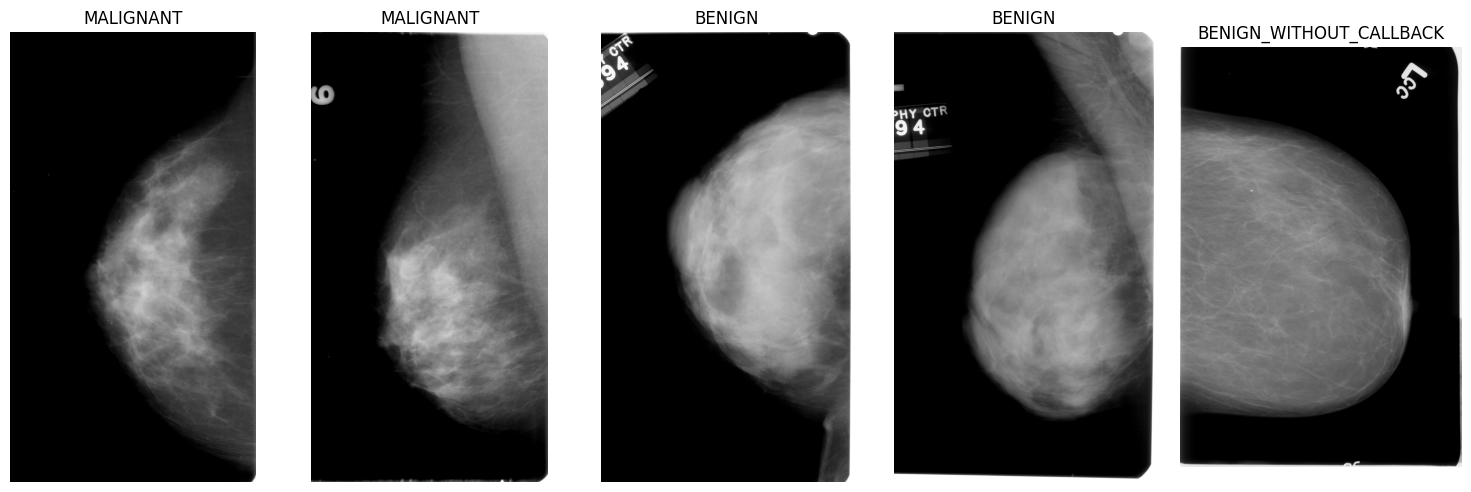

Cropped Mammograms:

(589, 677, 3)
(549, 681, 3)
(681, 577, 3)
(689, 761, 3)
(161, 177, 3)


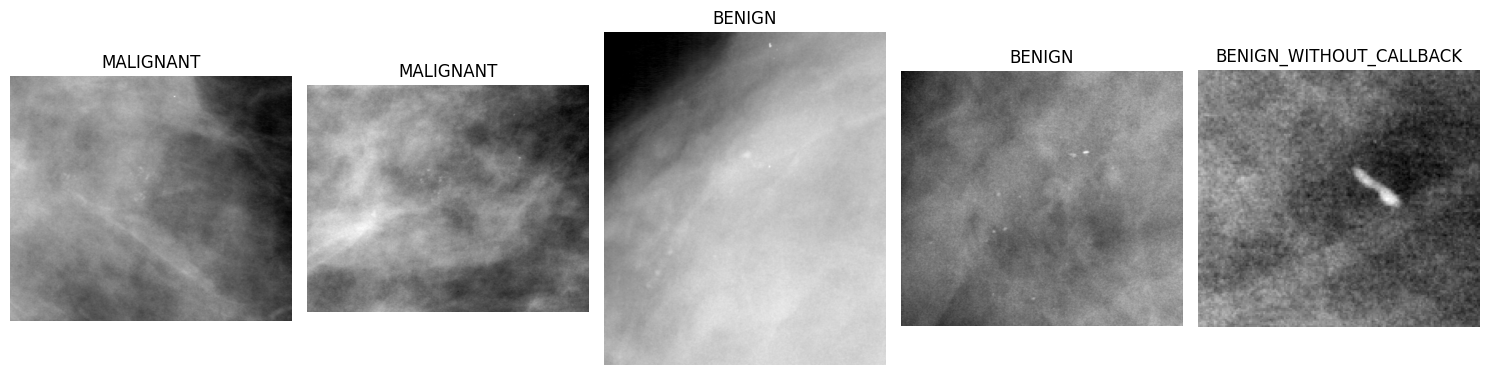

ROI_mask:

(5056, 2761, 3)
(5386, 2836, 3)
(5356, 2986, 3)
(5491, 3166, 3)
(4568, 3064, 3)


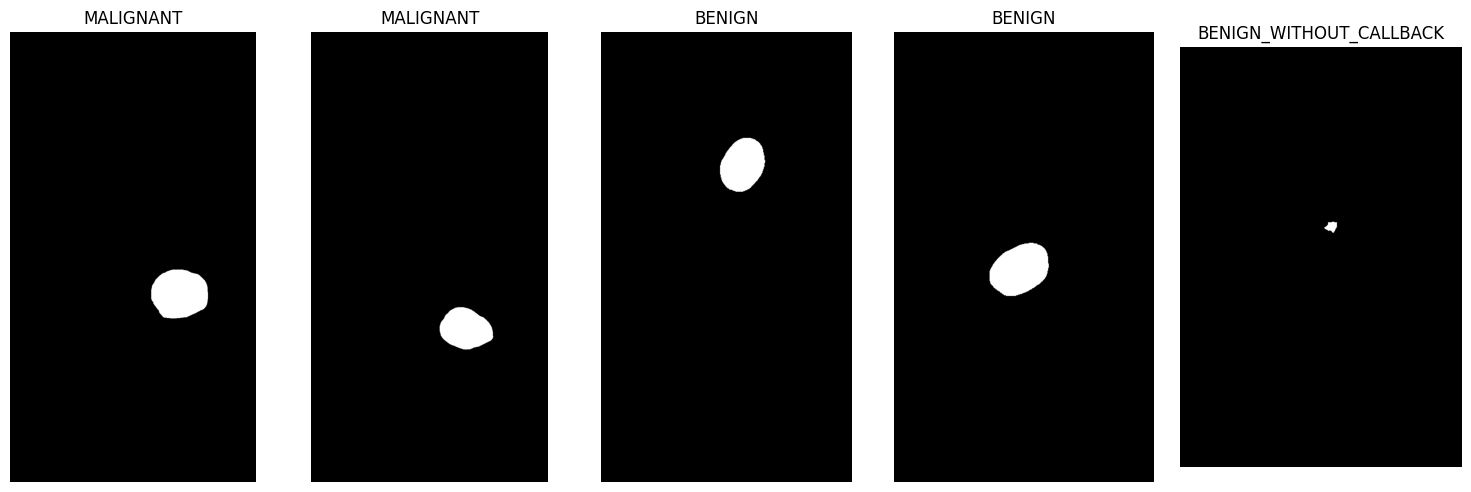

In [48]:
print('Full Mammograms:\n')
display_images(catr_df, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(catr_df, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(catr_df, 'ROI_mask_file_path', 5)

Full Mammograms:



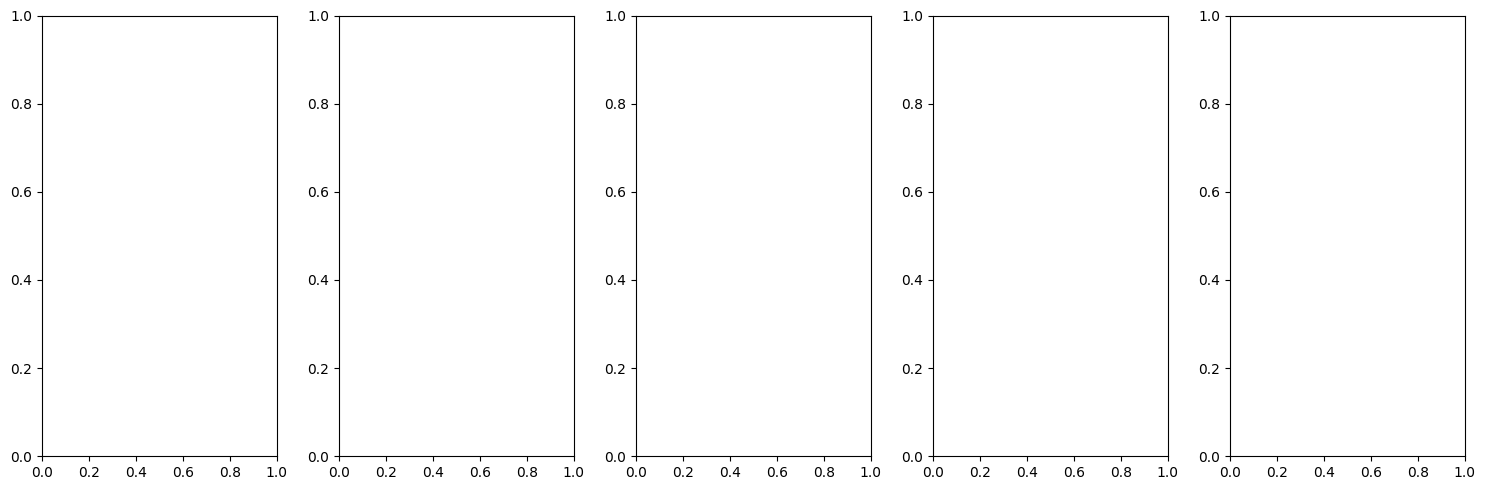

Cropped Mammograms:

(249, 265, 3)
(265, 249, 3)
(409, 660, 3)
(257, 724, 3)
(809, 833, 3)


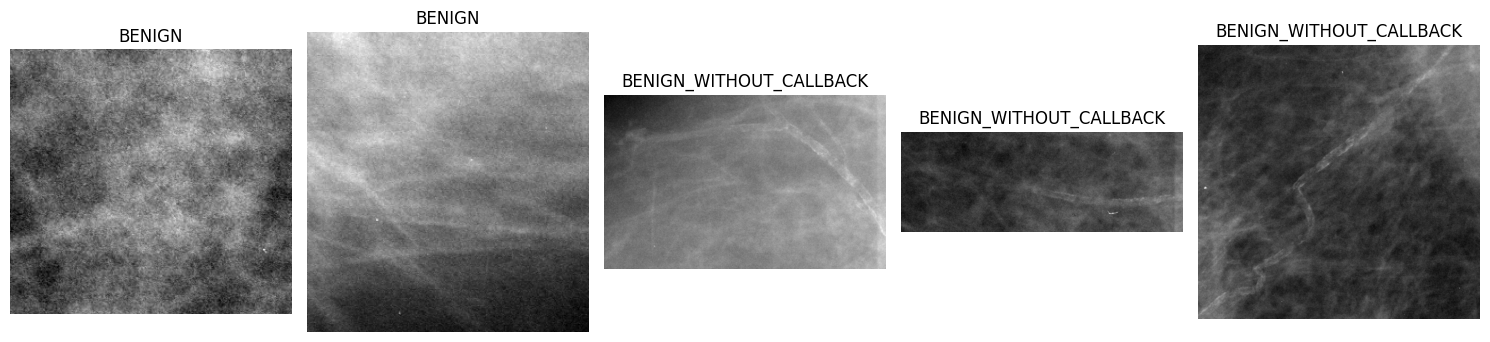

ROI_mask:



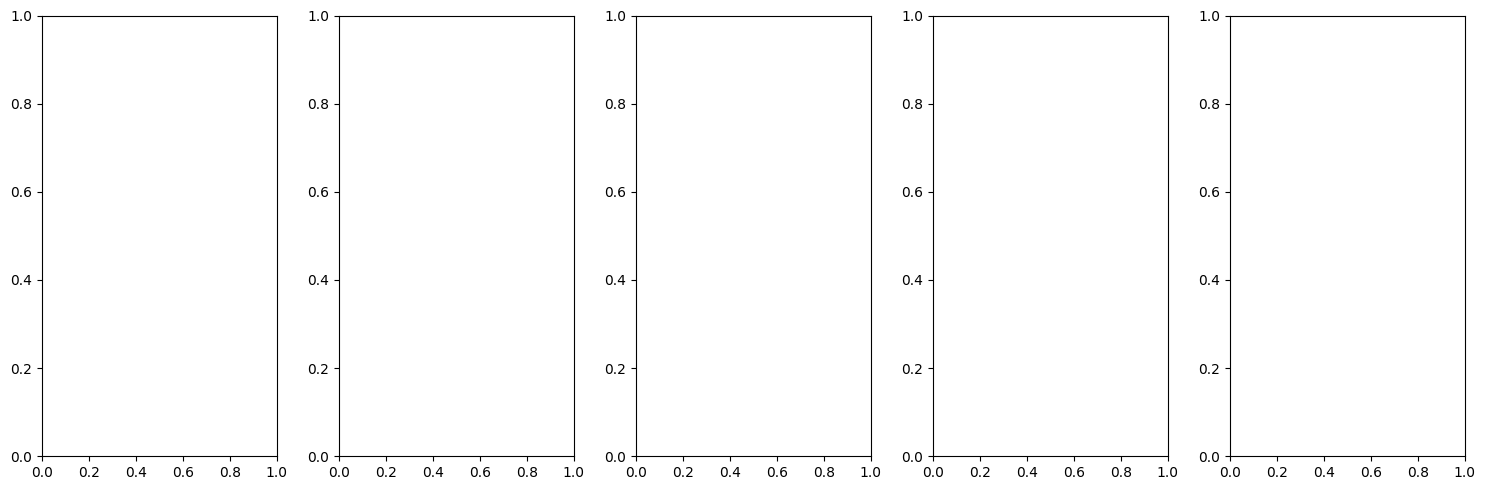

In [49]:
print('Full Mammograms:\n')
display_images(cate_df, 'image_file_path', 5)
print('Cropped Mammograms:\n')
display_images(cate_df, 'cropped_image_file_path', 5)
print('ROI_mask:\n')
display_images(cate_df, 'ROI_mask_file_path', 5)

In [50]:
calc_dataset = pd.concat([catr_df, cate_df], axis=0)

In [51]:
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

In [52]:


target_size = (224, 224, 3) #The height and width of the image (in pixels).The number of color channels (RGB → Red, Green, Blue).



In [53]:
# maps pathology labels to numerical values, and extracts valid image paths and their corresponding labels.
calc_dataset['labels'] = calc_dataset['pathology'].replace(class_mapper).infer_objects(copy=False)

calc_images = np.array(calc_dataset[calc_dataset["image_file_path"].notna()]["image_file_path"].tolist())
calc_labels = np.array(calc_dataset[calc_dataset["image_file_path"].notna()]["labels"].tolist())

/tmp/ipykernel_73/898833361.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calc_dataset['labels'] = calc_dataset['pathology'].replace(class_mapper).infer_objects(copy=False)


In [54]:
full_labels_series = pd.Series(calc_labels)

# Count the occurrences of each class
label_counts = full_labels_series.value_counts()

# Assuming 0 = benign and 1 = malignant
benign_count = label_counts.get(0, 0)
malignant_count = label_counts.get(1, 0)

print(f"Benign images: {benign_count}")
print(f"Malignant images: {malignant_count}")

Benign images: 1018
Malignant images: 570


In [55]:
def images_count():
    zero_class_count = len(os.listdir("/kaggle/working/merged_images/0"))
    one_class_count  = len(os.listdir("/kaggle/working/merged_images/1"))

    print(f"Number of images in class 0: {zero_class_count}")
    print(f"Number of images in class 1: {one_class_count}")

In [56]:
#data augmentation techniques to an image using TensorFlow's tf.image module. Data augmentation artificially increases dataset diversity by applying random transformations, making the model more robust and generalized.
def augment_image(image):
    # Apply data augmentation using tf.image functions
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    return image

# Function to resize image to (224, 224, 3)
def resize_image(image_tensor):
    return tf.image.resize(image_tensor, [224, 224])

# Function to balance classes by augmenting images
def copy_images_with_unique_filenames(images, labels, source, destination, target_count=None):
    
    benign_images = 0
    malignant_images = 0
    skipped_images = []

    # Create the destination subfolders '0' and '1'
    category_dest_dir_zero = os.path.join(destination, '0')
    os.makedirs(category_dest_dir_zero, exist_ok=True)

    category_dest_dir_one = os.path.join(destination, '1')
    os.makedirs(category_dest_dir_one, exist_ok=True)

    benign_images_list = []
    malignant_images_list = []

    for i, (image, label) in enumerate(zip(images, labels)):
        if os.path.exists(image):
            try:
                # Generate a unique filename
                filename = os.path.basename(image)
                unique_filename = f"{uuid.uuid4().hex}_{filename}"
        
                # Open the image using PIL
                with Image.open(image) as img:
                    # Convert the image to RGB mode (for saving as JPEG)
                    img = img.convert('RGB')
                    # Augment the image (convert it to a Tensor first)
                    img_tensor = tf.convert_to_tensor(img)
                    # Resize the image to (224, 224, 3)
                    resized_img_tensor = resize_image(img_tensor)
                    augmented_image_tensor = augment_image(resized_img_tensor)
                    # Convert Tensor back to PIL image for saving
                    augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image_tensor)

                    if label == 0:
                        benign_images_list.append(unique_filename)
                        dest_path = os.path.join(category_dest_dir_zero, unique_filename)
                        augmented_image.save(dest_path, 'JPEG')
                        benign_images += 1

                    elif label == 1:
                        malignant_images_list.append(unique_filename)
                        dest_path = os.path.join(category_dest_dir_one, unique_filename)
                        augmented_image.save(dest_path, 'JPEG')
                        malignant_images += 1

            except Exception as e:
                print(f"Error copying image {image}: {e}")
                skipped_images.append(image)
        else:
            print(f"Image not found: {image}")
            skipped_images.append(image)

    # If balancing is needed, duplicate/augment images from the smaller class
    benign_count = len(benign_images_list)
    malignant_count = len(malignant_images_list)

    if benign_count < malignant_count:
        augment_and_save_images(benign_images_list, category_dest_dir_zero, malignant_count - benign_count)

    elif malignant_count < benign_count:
        augment_and_save_images(malignant_images_list, category_dest_dir_one, benign_count - malignant_count)
    print("data balancing")
    images_count()
    augment_and_save_images(benign_images_list, category_dest_dir_zero, target_count)
    augment_and_save_images(malignant_images_list, category_dest_dir_one, target_count)
    print("data augmentation")
    images_count()
    
    print(f"\nCopying complete.")
    print(f"Benign images copied (label 0): {benign_images}")
    print(f"Benign count (label 0): {benign_count}")
    print(f"Malignant images copied (label 1): {malignant_images}")
    print(f"Malignant count (label 1): {malignant_count}")
    print(f"Total skipped images: {len(skipped_images)}")
    if skipped_images:
        print("Skipped images:")
        for img in skipped_images:
            print(img)
            
    del skipped_images, benign_images_list, malignant_images_list
    gc.collect()

# Function to augment and save images to balance the dataset
def augment_and_save_images(images_list, destination_dir, num_augments):
    for i in range(num_augments):
        img_name = random.choice(images_list)
        abs_path = os.path.join(destination_dir, img_name)

        try:
            with Image.open(abs_path) as img:
                img = img.convert('RGB')
                # Augment the image
                img_tensor = tf.convert_to_tensor(img)
                # Resize the image
                augmented_image_tensor = augment_image(img_tensor)
                # Convert Tensor back to PIL image for saving
                augmented_image = tf.keras.preprocessing.image.array_to_img(augmented_image_tensor)
                # Remove the original extension from img_name 1-285.jpg --> 1-285
                img_name_without_ext = os.path.splitext(img_name)[0]
                # Save augmented image with a unique name
                augmented_image.save(os.path.join(destination_dir, img_name_without_ext + f'_aug{i}.jpg'), 'JPEG')
        except Exception as e:
            print(f"Error augmenting image {abs_path}: {e}")

# Example usage
source_dir = "/kaggle/input/mias-mammography/all-mias"
destination_dir = "/kaggle/working/merged_images"

# target_count=0 meaning no Augmentation, There's just Data-Balance
target_count = int((len(calc_labels) * 5) // 2)
copy_images_with_unique_filenames(calc_images, calc_labels, source_dir, destination_dir, target_count)

I0000 00:00:1752576069.829490      73 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752576069.830203      73 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


data balancing
Number of images in class 0: 1018
Number of images in class 1: 1018
data augmentation
Number of images in class 0: 4988
Number of images in class 1: 4988

Copying complete.
Benign images copied (label 0): 1018
Benign count (label 0): 1018
Malignant images copied (label 1): 570
Malignant count (label 1): 570
Total skipped images: 0


In [57]:
data_dir = '/kaggle/working/merged_images'  # Update with your dataset path

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    # image_size=(224, 224),
    image_size=(224, 224),
    seed=30,
    shuffle=True,
    batch_size=13  # Set your desired batch size
)

Found 9976 files belonging to 2 classes.


Shape of Images: (13, 224, 224, 3)
Shape of Labels: (13, 2)

First 10 Labels (One-Hot Encoded):
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


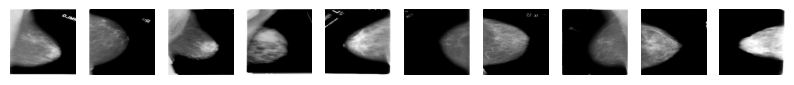

In [58]:
for images, labels in full_dataset.take(1):  # Take the first batch
    print("Shape of Images:", images.shape)  # Should be (batch_size, 224, 224, 3)
    print("Shape of Labels:", labels.shape)  # Should be (batch_size, number_of_classes)
    
    # Print first 5 label values
    print("\nFirst 10 Labels (One-Hot Encoded):\n", labels.numpy()[:10])
    
    # Display some images with their labels
    plt.figure(figsize=(10, 5))
    for i in range(min(10, len(images))): 
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image format
        plt.axis("off")
    plt.show()

In [59]:
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Step 3: Split the dataset into train, validation, and test sets
train_size = int(0.8* total_samples)                 # 80% for training
test_size = total_samples - train_size                # 20% for testing

# Create train, validation, and test datasets
train_dataset       = full_dataset.take(train_size)
test_dataset        = full_dataset.skip(train_size)

# Prefetch to Improve Performance
train_dataset      = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset       = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(8) ==> {train_size*13}")
print(f"Test samples:       {test_size}      batches(8) ==> {test_size*13}")

Train samples:      614     batches(8) ==> 7982
Test samples:       154      batches(8) ==> 2002


In [60]:
def check_missing_samples(dataset, dataset_name):
    missing_count = 0
    for batch, labels in dataset:
        batch_nan = np.any(np.isnan(batch.numpy()))  # Check if any image has NaN values
        label_nan = np.any(np.isnan(labels.numpy()))  # Check if any label is NaN
        
        if batch_nan or label_nan:
            missing_count += 1
    
    print(f"{dataset_name}: Found {missing_count} batches with missing values")

# Check both training and test datasets
check_missing_samples(train_dataset, "Train Dataset")
check_missing_samples(test_dataset, "Test Dataset")

Train Dataset: Found 0 batches with missing values
Test Dataset: Found 0 batches with missing values


In [61]:
#applies a negative transformation to medical images (benign & malignant cases) and saves them in a new directory.
#The negative transformation helps enhance contrast and highlight subtle patterns,


# Define the data directory and the output directory
data_dir = '/kaggle/working/merged_images'
Neg_dir = '/kaggle/working/Negative_Images'

# Create the output directory if it doesn't exist
os.makedirs(Neg_dir, exist_ok=True)

# Define the subdirectories for benign and malignant images
subdirs = ['0', '1']  # 0 for Benign, 1 for Malignant

for subdir in subdirs:
    # Create a corresponding subdirectory in the output directory
    os.makedirs(os.path.join(Neg_dir, subdir), exist_ok=True)
    
    # Define the path to the current subdirectory
    current_dir = os.path.join(data_dir, subdir)
    
    # Loop through all images in the current subdirectory
    for filename in os.listdir(current_dir):
        # Construct the full file path
        file_path = os.path.join(current_dir, filename)
        
        # Read the image
        image = cv2.imread(file_path)
        
        # Check if the image was loaded successfully
        if image is not None:
            # Convert to grayscale (if necessary)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Apply negative transformation
            negative_image = 255 - gray_image
            
            # Save the negative image in the corresponding output directory
            output_file_path = os.path.join(Neg_dir, subdir, filename)
            cv2.imwrite(output_file_path, negative_image)
        else:
            print(f"Warning: Could not read image {file_path}")

print("Negative transformation applied and images saved successfully.")

Negative transformation applied and images saved successfully.


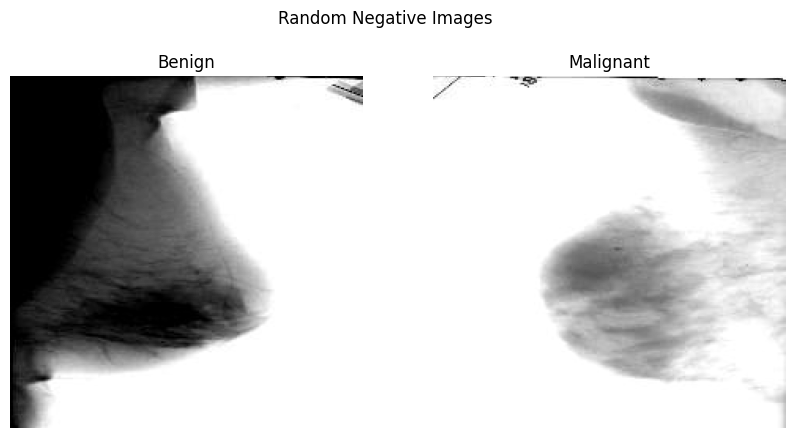

In [62]:
#Verifies that negative images were correctly processed
#Ensures the images are properly stored in their respective directories (0 = Benign, 1 = Malignant)
#Helps identify errors or incorrect image transformations
#Useful for sanity checks before training ResNet50 on negative images

import random


# Function to display one random sample image from each category
def display_random_samples(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random Negative Images')
    plt.show()

# Display one random sample from the output directory
display_random_samples(Neg_dir, subdirs)

In [63]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [64]:
#Enhances contrast in medical images (especially mammograms).
#Makes tumors, tissues, and patterns more visible.
#Prepares preprocessed images for ResNet50 training.
#Ensures equal brightness across different regions (compared to standard histogram equalization).

from skimage import exposure

# Define the data directory and the output directory
data_dir = '/kaggle/working/merged_images'
AHE_dir = '/kaggle/working/AHistogram_Images'

# Create the output directory if it doesn't exist
os.makedirs(AHE_dir, exist_ok=True)

# Define the subdirectories for benign and malignant images
subdirs = ['0', '1']  # 0 for Benign, 1 for Malignant

# Function to apply Adaptive Histogram Equalization and save images
def apply_adaptive_histogram_equalization(data_dir, output_dir):
    for subdir in subdirs:
        # Create a corresponding subdirectory in the output directory
        os.makedirs(os.path.join(output_dir, subdir), exist_ok=True)
        
        # Define the path to the current subdirectory
        current_dir = os.path.join(data_dir, subdir)
        
        # Loop through all images in the current subdirectory
        for filename in os.listdir(current_dir):
            # Construct the full file path
            file_path = os.path.join(current_dir, filename)
            
            # Read the image
            image = cv2.imread(file_path)
            
            # Check if the image was loaded successfully
            if image is not None:
                # Convert to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
                # Apply Adaptive Histogram Equalization
                image_adapteq = exposure.equalize_adapthist(gray_image, clip_limit=0.03)
                
                # Convert the image back to uint8 format (0-255)
                image_adapteq = (image_adapteq * 255).astype(np.uint8)
                
                # Save the equalized image in the corresponding output directory
                output_file_path = os.path.join(output_dir, subdir, filename)
                cv2.imwrite(output_file_path, image_adapteq)
            else:
                print(f"Warning: Could not read image {file_path}")

# Call the function to apply the transformation
apply_adaptive_histogram_equalization(data_dir, AHE_dir)

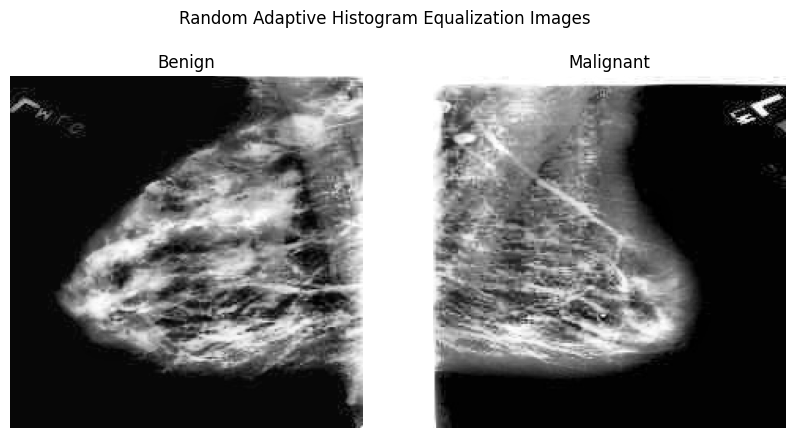

In [65]:
# Function to display one random sample image from each category
def display_random_samples(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random Adaptive Histogram Equalization Images')
    plt.show()


# Display one random sample from the output directory
display_random_samples('/kaggle/working/AHistogram_Images', subdirs)

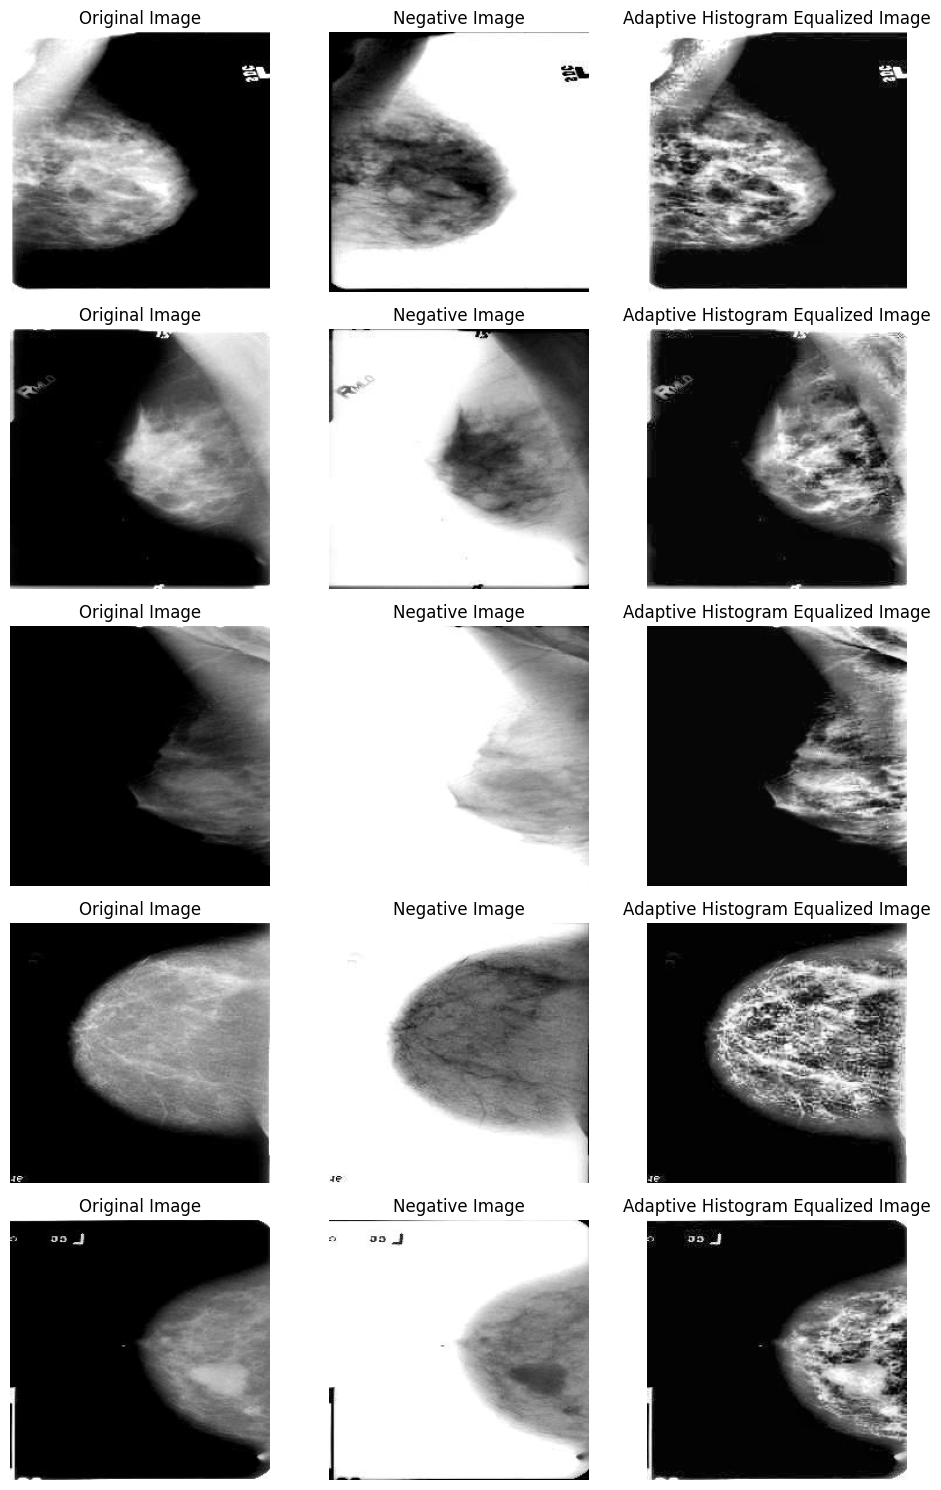

In [66]:
def display_images():
    # Get the image names from the merged images directory
    image_names = [f for f in os.listdir('/kaggle/working/merged_images/1') if f.endswith(('.jpg', '.png'))][:5]

    # Create subplots for 5 images and 3 columns (original, Negative , Adaptive histogram equalized)
    fig, axs = plt.subplots(5, 3, figsize=(10, 15))

    for i, image_name in enumerate(image_names):
        # Get the full paths to the images
        image_path1 = os.path.join('/kaggle/working/merged_images/1', image_name)  # Original Image
        image_path2 = os.path.join('/kaggle/working/Negative_Images/1', image_name)  # Negative Image
        image_path3 = os.path.join('/kaggle/working/AHistogram_Images/1', image_name)  # Adaptive Histogram Equalized Image

        # Open the images
        image1 = Image.open(image_path1).convert('L')  # Convert to grayscale for original
        image2 = Image.open(image_path2)
        image3 = Image.open(image_path3)

        # Display the images in the subplots
        axs[i, 0].imshow(image1, cmap='gray')
        axs[i, 0].axis('off')
        axs[i, 0].set_title('Original Image')

        axs[i, 1].imshow(image2, cmap='gray')
        axs[i, 1].axis('off')
        axs[i, 1].set_title('Negative Image')

        axs[i, 2].imshow(image3, cmap='gray')
        axs[i, 2].axis('off')
        axs[i, 2].set_title('Adaptive Histogram Equalized Image')

    plt.tight_layout()
    plt.show()

display_images()

In [67]:
from skimage import feature

# Define the data directory and the output directory
data_dir = '/kaggle/working/merged_images'
output_dir = '/kaggle/working/Hog_Images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the subdirectories for benign and malignant images
subdirs = ['0', '1']  # 0 for Benign, 1 for Malignant

def apply_hog_and_save(data_dir, output_dir):
    # Iterate through each subdirectory
    for subdir in subdirs:
        # Create a corresponding subdirectory in the output directory
        os.makedirs(os.path.join(output_dir, subdir), exist_ok=True)
        
        # Define the path to the current subdirectory
        current_dir = os.path.join(data_dir, subdir)
        
        # Get the list of image files in the current subdirectory
        image_files = os.listdir(current_dir)
        
        # Process each image file
        for filename in image_files:
            # Prepare the full path for the image
            file_path = os.path.join(current_dir, filename)
            output_path = os.path.join(output_dir, subdir, filename)
            
            # Read the image
            image = cv2.imread(file_path)
        
            # Check if the image was loaded successfully
            if image is not None:
                # Convert to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
                # Compute HOG features
                hog_features, hog_image = feature.hog(
                    gray_image,
                    orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=True
                )
                
                # Scale the HOG image for better visualization
                hog_image = (hog_image * 255).astype(np.uint8)
                
                # Save the HOG image
                cv2.imwrite(output_path, hog_image)
            else:
                print(f"Warning: Could not read image {file_path}")

# Call the function to apply HOG and save images
apply_hog_and_save(data_dir, output_dir)

print("HOG features extracted and images saved successfully.")

HOG features extracted and images saved successfully.


In [68]:
import random


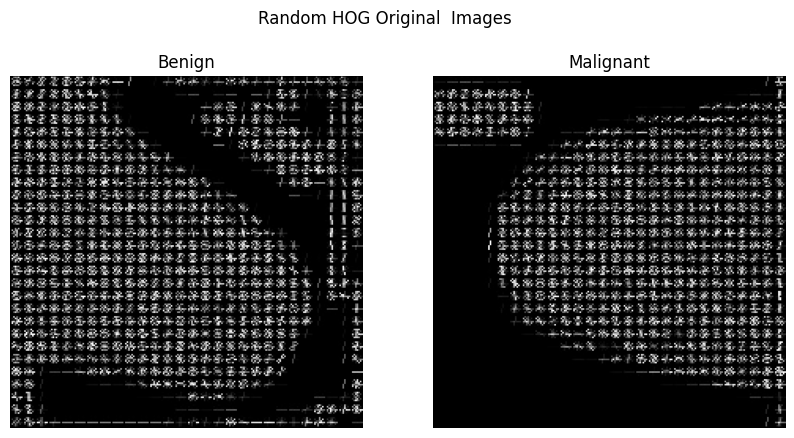

In [69]:
# Function to display one random sample image from each category
def display_random_samplesHog(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random HOG Original  Images')
    plt.show()

subdirs = ['0', '1']

# Display one random sample from the output directory
display_random_samplesHog('/kaggle/working/Hog_Images', subdirs)

In [70]:
# Define the data directory and the output directory -- 2 hours ib  GPU 
data_dir = '/kaggle/working/Negative_Images'
output_dir = '/kaggle/working/HogNeg_Images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Call the function to apply HOG and save images
apply_hog_and_save(data_dir, output_dir)

print("HOG features extracted and images saved successfully.")

HOG features extracted and images saved successfully.


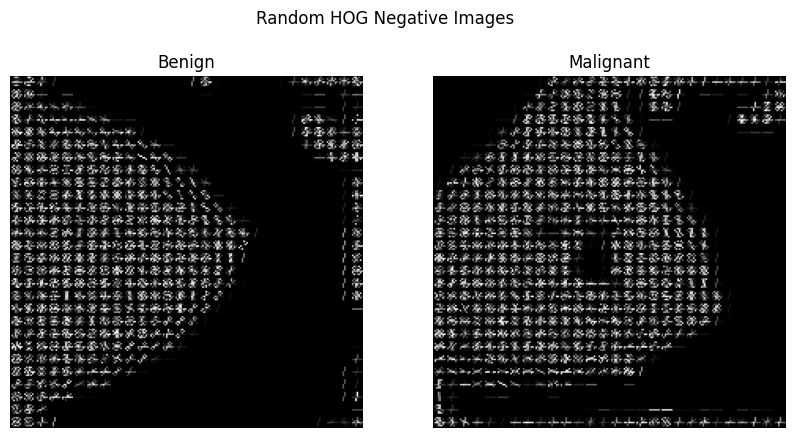

In [71]:
import random


# Function to display one random sample image from each category
def display_random_samplesHogNeg(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random HOG Negative Images')
    plt.show()

subdirs = ['0', '1']

# Display one random sample from the output directory
display_random_samplesHogNeg('/kaggle/working/HogNeg_Images', subdirs)

In [72]:
# Define the data directory and the output directory
data_dir = '/kaggle/working/AHistogram_Images'
output_dir = '/kaggle/working/HogAHE_Images'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Call the function to apply HOG and save images
apply_hog_and_save(data_dir, output_dir)

print("HOG features extracted and images saved successfully")

HOG features extracted and images saved successfully


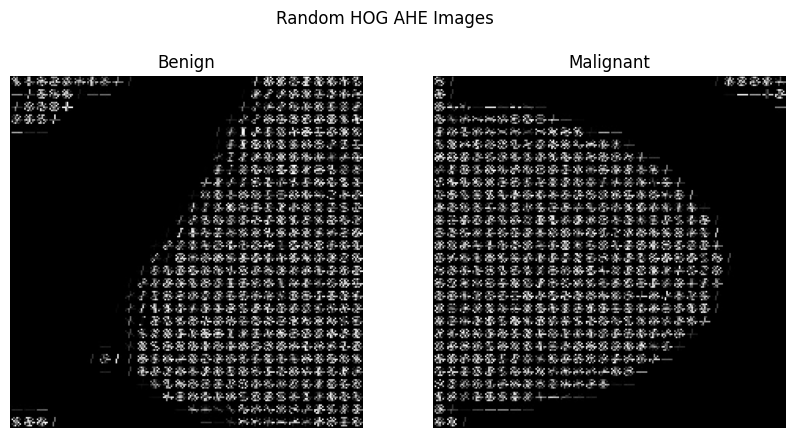

In [73]:
import random


# Function to display one random sample image from each category
def display_random_samplesHogNeg(output_dir, subdirs):
    plt.figure(figsize=(10, 5))
    
    for subdir in subdirs:
        current_dir = os.path.join(output_dir, subdir)
        sample_files = os.listdir(current_dir)
        
        # Select a random file from the list
        if sample_files:  # Check if there are any files
            random_file = random.choice(sample_files)
            file_path = os.path.join(current_dir, random_file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale for display
            
            plt.subplot(1, 2, int(subdir) + 1)
            plt.imshow(image, cmap='gray')
            plt.title('Benign' if subdir == '0' else 'Malignant')
            plt.axis('off')
    
    plt.suptitle('Random HOG AHE Images')
    plt.show()

subdirs = ['0', '1']

# Display one random sample from the output directory
display_random_samplesHogNeg('/kaggle/working/HogAHE_Images', subdirs)

In [74]:
import tensorflow as tf

# Define the data directory
data_dir = '/kaggle/working/merged_images'

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='categorical',  # Use categorical labels (one-hot encoding)
    image_size=(224, 224),  # Resize images to 224x224
    seed=50,  # Seed for random number generator
    shuffle=True,  # Shuffle the dataset
    batch_size=13  # Number of images to return in each batch
)

# Calculate the total number of samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Define sizes for training, validation, and test datasets
train_size = int(0.8 * total_samples)  # 80% for training
val_size = int(0.1 * total_samples)    # 10% for validation
test_size = total_samples - train_size - val_size  # Remaining 10% for testing

# Create train, validation, and test datasets
train_dataset = full_dataset.take(train_size)
validation_dataset = full_dataset.skip(train_size).take(val_size)
test_dataset = full_dataset.skip(train_size + val_size).take(test_size)

# Prefetch datasets for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

Found 9976 files belonging to 2 classes.


In [75]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.metrics import Precision, Recall

def create_modelCNN(input_shape=(224, 224, 3)):
    """Create and compile a CNN model for binary classification."""
    # Initialize the Sequential model
    model = Sequential()

    # Add layers to the model
    model.add(Input(shape=input_shape))  # Input layer for RGB images
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer for regularization
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Another Dropout layer
    model.add(Dense(2, activation='softmax'))  # Output layer for classification

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

    return model

In [76]:
import tensorflow as tf

# Define the data directory
data_dir = '/kaggle/working/Hog_Images'

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='categorical',  # Use categorical labels (one-hot encoding)
    image_size=(224, 224),  # Resize images to 224x224
    seed=50,  # Seed for random number generator
    shuffle=True,  # Shuffle the dataset
    batch_size=13  # Number of images to return in each batch
)

# Calculate the total number of samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Define sizes for training, validation, and test datasets
train_size = int(0.8 * total_samples)  # 70% for training
val_size = int(0.1 * total_samples)    # 10% for validation
test_size = total_samples - train_size - val_size  # Remaining 20% for testing

# Create train, validation, and test datasets
train_Neg_dataset = full_dataset.take(train_size)
validation_Neg_dataset = full_dataset.skip(train_size).take(val_size)
test_Neg_dataset = full_dataset.skip(train_size + val_size).take(test_size)

# Prefetch datasets for performance
trainHOG_original_dataset = train_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validationHOG_original_dataset = validation_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
testHOG_original_dataset = test_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(13) ==> {train_size * 13}")
print(f"Validation samples: {val_size}       batches(13) ==> {val_size * 13}")
print(f"Test samples:       {test_size}       batches(13) ==> {test_size * 13}")

Found 9976 files belonging to 2 classes.
Train samples:      614     batches(13) ==> 7982
Validation samples: 76       batches(13) ==> 988
Test samples:       78       batches(13) ==> 1014


In [77]:
model_HOG = create_modelCNN()

Hog_Original = model_HOG.fit(
           trainHOG_original_dataset,
            validation_data= validationHOG_original_dataset, batch_size=13, 
            epochs=50)

Epoch 1/50


I0000 00:00:1752580050.882700     115 service.cc:148] XLA service 0x7947b00024f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752580050.887924     115 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752580050.887950     115 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752580051.638219     115 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/614 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.5033 - loss: 36.7940 - precision: 0.5033 - recall: 0.5033 

I0000 00:00:1752580058.836736     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


614/614 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.5706 - loss: 2.7967 - precision: 0.5706 - recall: 0.5706 - val_accuracy: 0.6326 - val_loss: 0.6489 - val_precision: 0.6326 - val_recall: 0.6326
Epoch 2/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.6578 - loss: 0.6176 - precision: 0.6578 - recall: 0.6578 - val_accuracy: 0.6518 - val_loss: 0.6194 - val_precision: 0.6518 - val_recall: 0.6518
Epoch 3/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.6802 - loss: 0.5968 - precision: 0.6802 - recall: 0.6802 - val_accuracy: 0.6893 - val_loss: 0.5701 - val_precision: 0.6893 - val_recall: 0.6893
Epoch 4/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7097 - loss: 0.5453 - precision: 0.7097 - recall: 0.7097 - val_accuracy: 0.6893 - val_loss: 0.6074 - val_precision: 0.6893 - val_recall: 0.6893
Epoch 5/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7364 - loss: 0.5203 - precision: 0.7364 - recall: 0.7364 - val_accuracy: 0.7156 - val_loss: 0.5

In [78]:
Hog_Original_Result = model_HOG.evaluate(testHOG_original_dataset)

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8948 - loss: 1.0187 - precision: 0.8948 - recall: 0.8948


In [79]:
# Define the data directory
data_dir = '/kaggle/working/HogNeg_Images'

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='categorical',  # Use categorical labels (one-hot encoding)
    image_size=(224, 224),  # Resize images to 224x224
    seed=50,  # Seed for random number generator
    shuffle=True,  # Shuffle the dataset
    batch_size=13  # Number of images to return in each batch
)

# Calculate the total number of samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Define sizes for training, validation, and test datasets
train_size = int(0.8 * total_samples)  # 70% for training
val_size = int(0.1 * total_samples)    # 10% for validation
test_size = total_samples - train_size - val_size  # Remaining 20% for testing

# Create train, validation, and test datasets
train_Neg_dataset = full_dataset.take(train_size)
validation_Neg_dataset = full_dataset.skip(train_size).take(val_size)
test_Neg_dataset = full_dataset.skip(train_size + val_size).take(test_size)

# Prefetch datasets for performance
trainHOG_Neg_dataset = train_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validationHOG_Neg_dataset = validation_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
testHOG_Neg_dataset = test_Neg_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(13) ==> {train_size * 13}")
print(f"Validation samples: {val_size}       batches(13) ==> {val_size * 13}")
print(f"Test samples:       {test_size}       batches(13) ==> {test_size * 13}")

Found 9976 files belonging to 2 classes.
Train samples:      614     batches(13) ==> 7982
Validation samples: 76       batches(13) ==> 988
Test samples:       78       batches(13) ==> 1014


In [80]:
model_HOG_Neg = create_modelCNN()

Hog_Neg = model_HOG_Neg.fit(
            trainHOG_Neg_dataset,
            validation_data= validationHOG_Neg_dataset, batch_size=13, 
            epochs=50
        )

Epoch 1/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.5659 - loss: 2.2659 - precision: 0.5659 - recall: 0.5659 - val_accuracy: 0.6538 - val_loss: 0.6375 - val_precision: 0.6538 - val_recall: 0.6538
Epoch 2/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.6577 - loss: 0.6216 - precision: 0.6577 - recall: 0.6577 - val_accuracy: 0.6761 - val_loss: 0.5977 - val_precision: 0.6761 - val_recall: 0.6761
Epoch 3/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.6878 - loss: 0.5923 - precision: 0.6878 - recall: 0.6878 - val_accuracy: 0.6812 - val_loss: 0.6108 - val_precision: 0.6812 - val_recall: 0.6812
Epoch 4/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.7155 - loss: 0.5499 - precision: 0.7155 - recall: 0.7155 - val_accuracy: 0.7237 - val_loss: 0.5398 - val_precision: 0.7237 - val_recall: 0.7237
Epoch 5/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7463 - loss: 0.5123 - precision: 0.7463 - recall: 0.7463 - val_accuracy: 0.6903 - va

In [81]:
Hog_Neg_Result = model_HOG_Neg.evaluate(testHOG_Neg_dataset)

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8792 - loss: 0.5665 - precision: 0.8792 - recall: 0.8792


In [82]:
# Define the data directory
data_dir = '/kaggle/working/HogAHE_Images'

# Create a dataset for the entire data to use for split
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='categorical',  # Use categorical labels (one-hot encoding)
    image_size=(224, 224),  # Resize images to 224x224
    seed=50,  # Seed for random number generator
    shuffle=True,  # Shuffle the dataset
    batch_size=13  # Number of images to return in each batch
)

# Calculate the total number of samples
total_samples = tf.data.experimental.cardinality(full_dataset).numpy()

# Define sizes for training, validation, and test datasets
train_size = int(0.8 * total_samples)  # 70% for training
val_size = int(0.1 * total_samples)    # 10% for validation
test_size = total_samples - train_size - val_size  # Remaining 20% for testing

# Create train, validation, and test datasets
train_AHE_dataset = full_dataset.take(train_size)
validation_AHE_dataset = full_dataset.skip(train_size).take(val_size)
test_AHE_dataset = full_dataset.skip(train_size + val_size).take(test_size)

# Prefetch datasets for performance
trainHOG_AHE_dataset = train_AHE_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validationHOG_AHE_dataset = validation_AHE_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
testHOG_AHE_dataset = test_AHE_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Print the number of samples in each dataset
print(f"Train samples:      {train_size}     batches(13) ==> {train_size * 13}")
print(f"Validation samples: {val_size}       batches(13) ==> {val_size * 13}")
print(f"Test samples:       {test_size}       batches(13) ==> {test_size * 13}")

Found 9976 files belonging to 2 classes.
Train samples:      614     batches(13) ==> 7982
Validation samples: 76       batches(13) ==> 988
Test samples:       78       batches(13) ==> 1014


In [83]:
model_HOG_AHE = create_modelCNN()

Hog_AHE = model_HOG_AHE.fit(
            trainHOG_AHE_dataset,
            validation_data= validationHOG_AHE_dataset,
            batch_size= 13,
            epochs=50
        )    

Epoch 1/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.5753 - loss: 2.7709 - precision: 0.5753 - recall: 0.5753 - val_accuracy: 0.6296 - val_loss: 0.6544 - val_precision: 0.6296 - val_recall: 0.6296
Epoch 2/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6610 - loss: 0.6246 - precision: 0.6610 - recall: 0.6610 - val_accuracy: 0.6589 - val_loss: 0.6070 - val_precision: 0.6589 - val_recall: 0.6589
Epoch 3/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.6808 - loss: 0.5990 - precision: 0.6808 - recall: 0.6808 - val_accuracy: 0.7115 - val_loss: 0.5894 - val_precision: 0.7115 - val_recall: 0.7115
Epoch 4/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.6996 - loss: 0.5760 - precision: 0.6996 - recall: 0.6996 - val_accuracy: 0.7115 - val_loss: 0.5727 - val_precision: 0.7115 - val_recall: 0.7115
Epoch 5/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7124 - loss: 0.5461 - precision: 0.7124 - recall: 0.7124 - val_accuracy: 0.6700 - va

In [103]:
HOG_AHE_Result = model_HOG_AHE.evaluate('test_HOG_AHE_dataset') 

ValueError: Unrecognized data type: x=test_HOG_AHE_dataset (of type <class 'str'>)

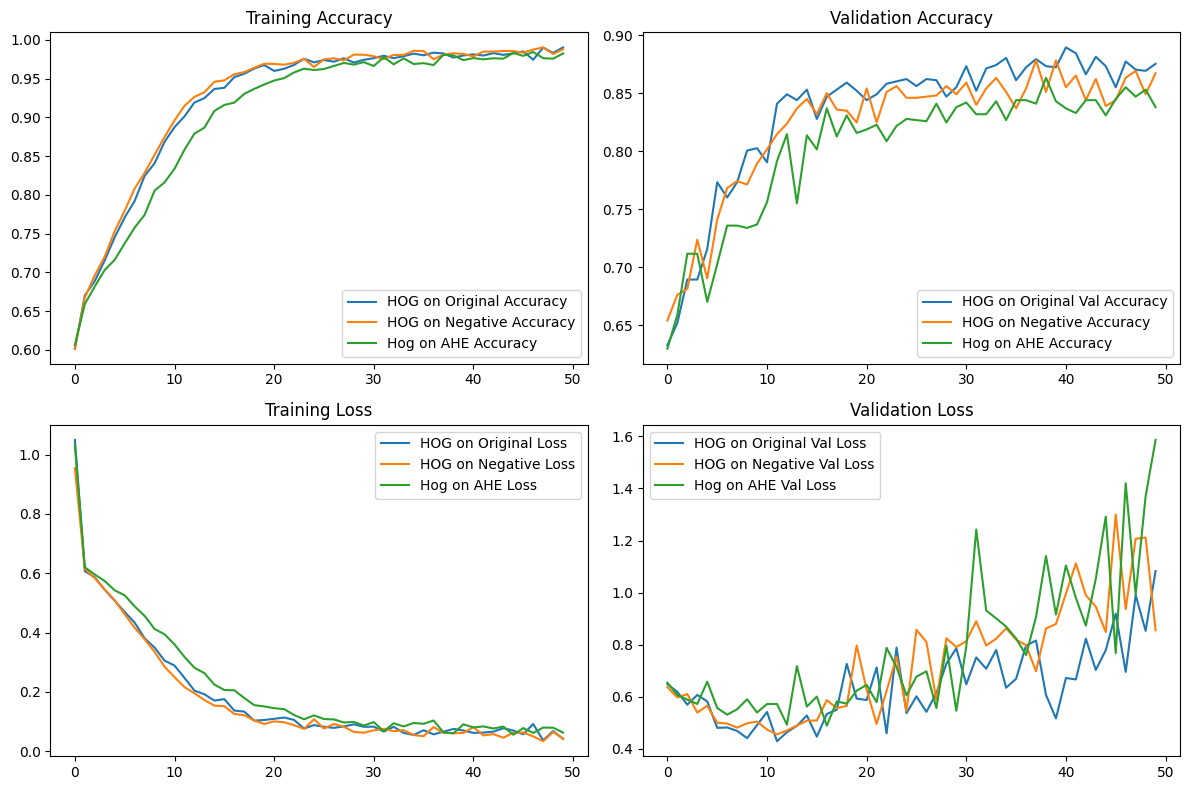

In [84]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(12, 8))


# Accuracy      
plt.subplot(2, 2, 1)
plt.plot(Hog_Original.history['accuracy'], label='HOG on Original Accuracy')
plt.plot(Hog_Neg.history['accuracy'], label='HOG on Negative Accuracy')
plt.plot(Hog_AHE.history['accuracy'], label='Hog on AHE Accuracy')
plt.title('Training Accuracy')
plt.legend()

# Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(Hog_Original.history['val_accuracy'], label='HOG on Original Val Accuracy')
plt.plot(Hog_Neg.history['val_accuracy'], label='HOG on Negative Accuracy')
plt.plot(Hog_AHE.history['val_accuracy'], label='Hog on AHE Accuracy')
plt.title('Validation Accuracy')
plt.legend()

# Loss    
plt.subplot(2, 2, 3)
plt.plot(Hog_Original.history['loss'], label='HOG on Original Loss')
plt.plot(Hog_Neg.history['loss'], label='HOG on Negative Loss')
plt.plot(Hog_AHE.history['loss'], label='Hog on AHE Loss')
plt.title('Training Loss')
plt.legend()

# Validation Loss
plt.subplot(2, 2, 4)
plt.plot(Hog_Original.history['val_loss'], label='HOG on Original Val Loss')
plt.plot(Hog_Neg.history['val_loss'], label='HOG on Negative Val Loss')
plt.plot(Hog_AHE.history['val_loss'], label='Hog on AHE Val Loss')
plt.title('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Trsining Accuracy on The Original HOG 

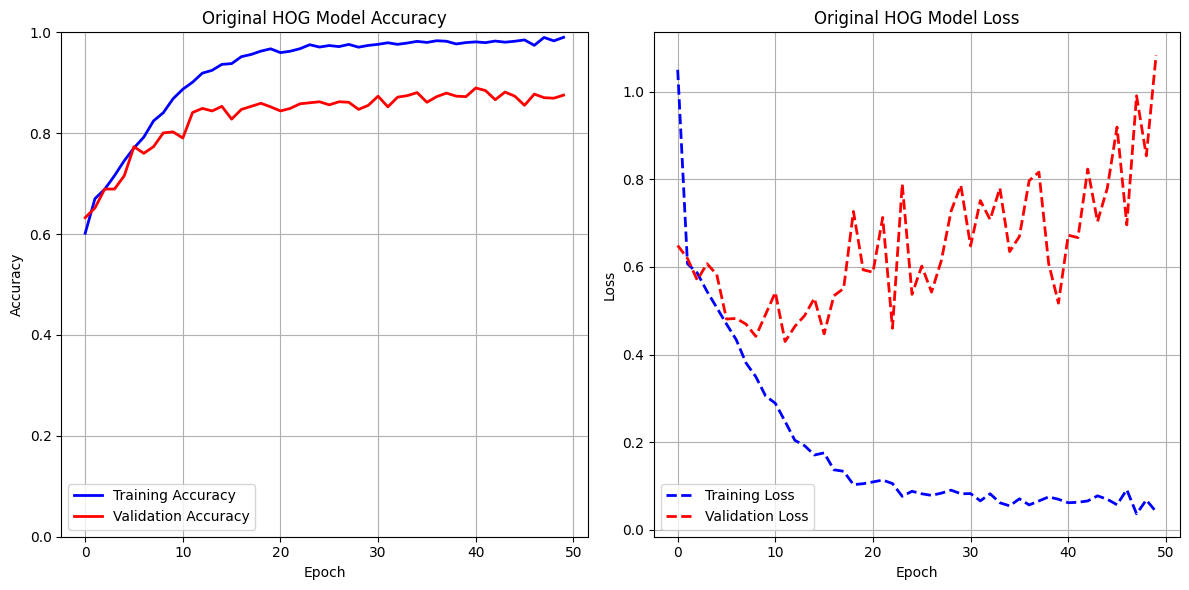

In [99]:
import matplotlib.pyplot as plt

# Plot accuracy curves for original HOG model only
plt.figure(figsize=(12, 6))

# Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(Hog_Original.history['accuracy'], 'b-', linewidth=2, label='Training Accuracy')
plt.plot(Hog_Original.history['val_accuracy'], 'r-', linewidth=2, label='Validation Accuracy')
plt.title('Original HOG Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits from 0 to 1 for accuracy
plt.legend()
plt.grid(True)

# Training Loss
plt.subplot(1, 2, 2)
plt.plot(Hog_Original.history['loss'], 'b--', linewidth=2, label='Training Loss')
plt.plot(Hog_Original.history['val_loss'], 'r--', linewidth=2, label='Validation Loss')
plt.title('Original HOG Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8837 - loss: 1.2540 - precision: 0.8837 - recall: 0.8837
Test Accuracy: 0.8807
Test Loss: 1.0294


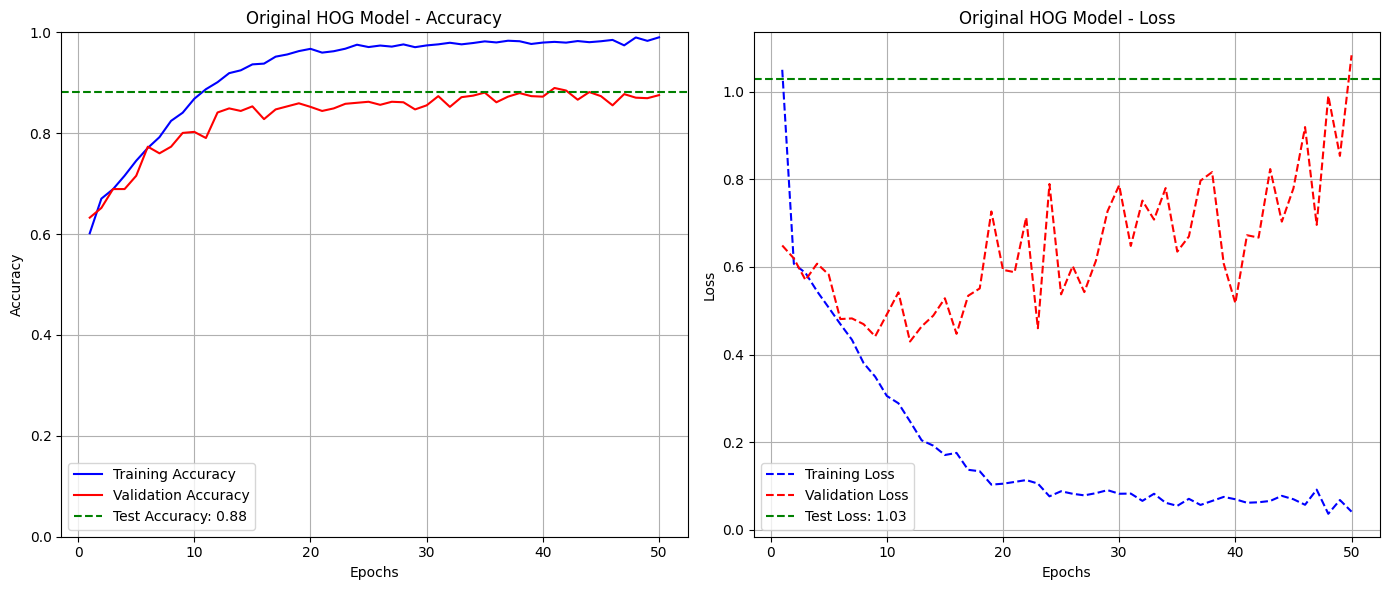

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# 1. First calculate test accuracy and loss
test_loss, test_acc, test_precision, test_recall = model_HOG.evaluate(testHOG_original_dataset)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 2. Plot training/validation/test metrics
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
epochs = range(1, len(Hog_Original.history['accuracy']) + 1)

# Training and Validation Accuracy
plt.plot(epochs, Hog_Original.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, Hog_Original.history['val_accuracy'], 'r-', label='Validation Accuracy')

# Test Accuracy (horizontal line)
plt.axhline(y=test_acc, color='g', linestyle='--', 
            label=f'Test Accuracy: {test_acc:.2f}')

plt.title('Original HOG Model - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0-1
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
# Training and Validation Loss
plt.plot(epochs, Hog_Original.history['loss'], 'b--', label='Training Loss')
plt.plot(epochs, Hog_Original.history['val_loss'], 'r--', label='Validation Loss')

# Test Loss (horizontal line)
plt.axhline(y=test_loss, color='g', linestyle='--', 
            label=f'Test Loss: {test_loss:.2f}')

plt.title('Original HOG Model - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [104]:
from tabulate import tabulate

# # Sample results (replace these with your actual results)
# accuracy = [Hog_Original_Result[1], Hog_Neg_Result[1], Hog_AHE_Result[1]]
# precision = [Hog_Original_Result[2], Hog_Neg_Result[2], Hog_AHE_Result[2]]
# recall = [Hog_Original_Result[3], Hog_Neg_Result[3], Hog_AHE_Result[3]]

accuracy = [Hog_Original_Result[1], Hog_Neg_Result[1]]  # removed Hog_AHE_Result
precision = [Hog_Original_Result[2], Hog_Neg_Result[2]]
recall = [Hog_Original_Result[3], Hog_Neg_Result[3]]


# Create a DataFrame
# data = {
#     "Features": ["Histogram of Oriented Gradients (HOG)", "Histogram of Oriented Gradients (HOG)", "Histogram of Oriented Gradients (HOG)"],
#     "Image Enhancement": ["Original Image", "Negative Transformer", "Adaptive Histogram Equalization"],
#     "Accuracy": accuracy,
#     "Precision": precision,
#     "Recall": recall
# }

data = {
    "Features": ["Histogram of Oriented Gradients (HOG)", "Histogram of Oriented Gradients (HOG)"],
    "Image Enhancement": ["Original Image", "Negative Transformer"],
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall
}




df = pd.DataFrame(data)

# Display the DataFrame in a beautiful format
print("\n---------------------------------------------------------------------------------------------------------\n")
print(tabulate(df, headers='keys', showindex=False))


---------------------------------------------------------------------------------------------------------

Features                               Image Enhancement       Accuracy    Precision    Recall
-------------------------------------  --------------------  ----------  -----------  --------
Histogram of Oriented Gradients (HOG)  Original Image          0.882704     0.882704  0.882704
Histogram of Oriented Gradients (HOG)  Negative Transformer    0.87674      0.87674   0.87674


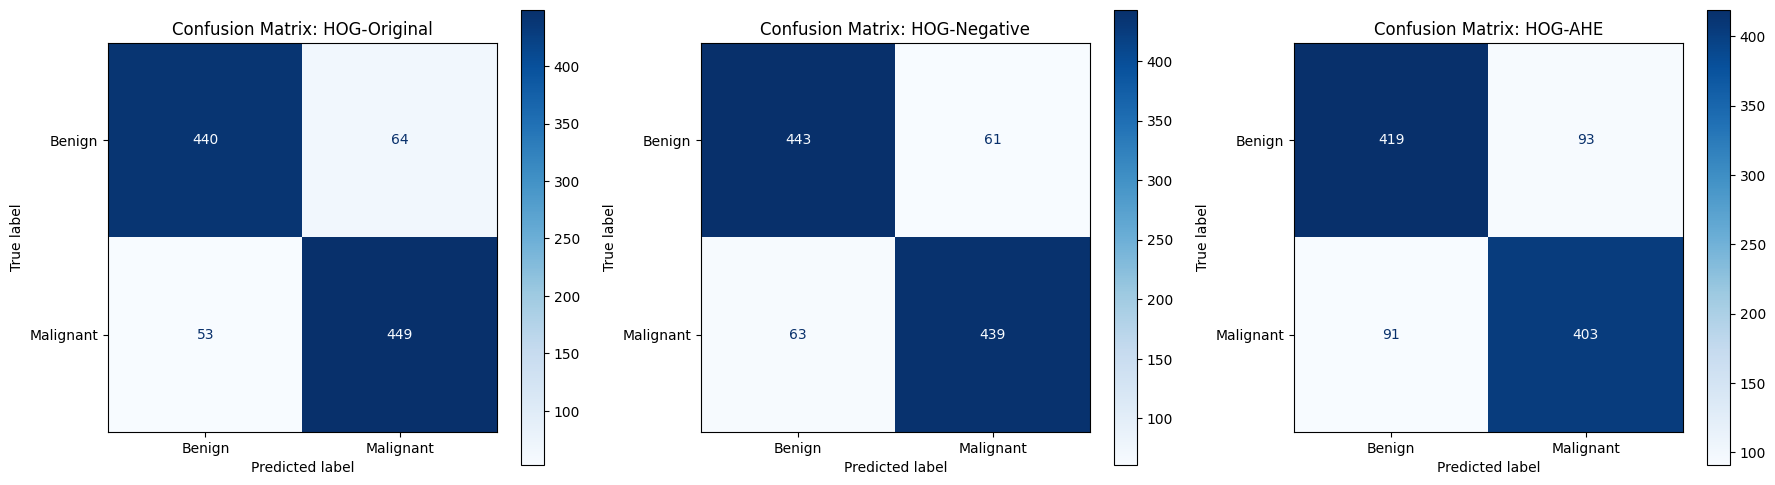


Metrics for HOG-Original:
True Negatives (Benign correct): 431
False Positives (Benign as Malignant): 69
False Negatives (Malignant as Benign): 56
True Positives (Malignant correct): 450
Accuracy: 0.8757
Precision: 0.8671
Recall: 0.8893
F1 Score: 0.8780

Metrics for HOG-Negative:
True Negatives (Benign correct): 437
False Positives (Benign as Malignant): 63
False Negatives (Malignant as Benign): 65
True Positives (Malignant correct): 441
Accuracy: 0.8728
Precision: 0.8750
Recall: 0.8715
F1 Score: 0.8733

Metrics for HOG-AHE:
True Negatives (Benign correct): 414
False Positives (Benign as Malignant): 95
False Negatives (Malignant as Benign): 91
True Positives (Malignant correct): 406
Accuracy: 0.8151
Precision: 0.8104
Recall: 0.8169
F1 Score: 0.8136


In [93]:
# GROK Recommendations for Plotting Confusion Matrix 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset:
        # Get model predictions
        predictions = model.predict(images, verbose=0)
        # Convert one-hot encoded labels and predictions to class indices
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))
    return np.array(y_true), np.array(y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(title)

# Define datasets and models
datasets = {
    'HOG-Original': testHOG_original_dataset,
    'HOG-Negative': testHOG_Neg_dataset,
    'HOG-AHE': testHOG_AHE_dataset
}
models = {
    'HOG-Original': model_HOG,
    'HOG-Negative': model_HOG_Neg,
    'HOG-AHE': model_HOG_AHE
}

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Generate and plot confusion matrices for each model
for idx, (name, dataset) in enumerate(datasets.items()):
    model = models[name]
    y_true, y_pred = get_predictions_and_labels(model, dataset)
    plot_confusion_matrix(y_true, y_pred, f'Confusion Matrix: {name}', axes[idx])

plt.tight_layout()
plt.show()

# Calculate and print performance metrics
for name, dataset in datasets.items():
    model = models[name]
    y_true, y_pred = get_predictions_and_labels(model, dataset)
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    print(f"\nMetrics for {name}:")
    print(f"True Negatives (Benign correct): {tn}")
    print(f"False Positives (Benign as Malignant): {fp}")
    print(f"False Negatives (Malignant as Benign): {fn}")
    print(f"True Positives (Malignant correct): {tp}")
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


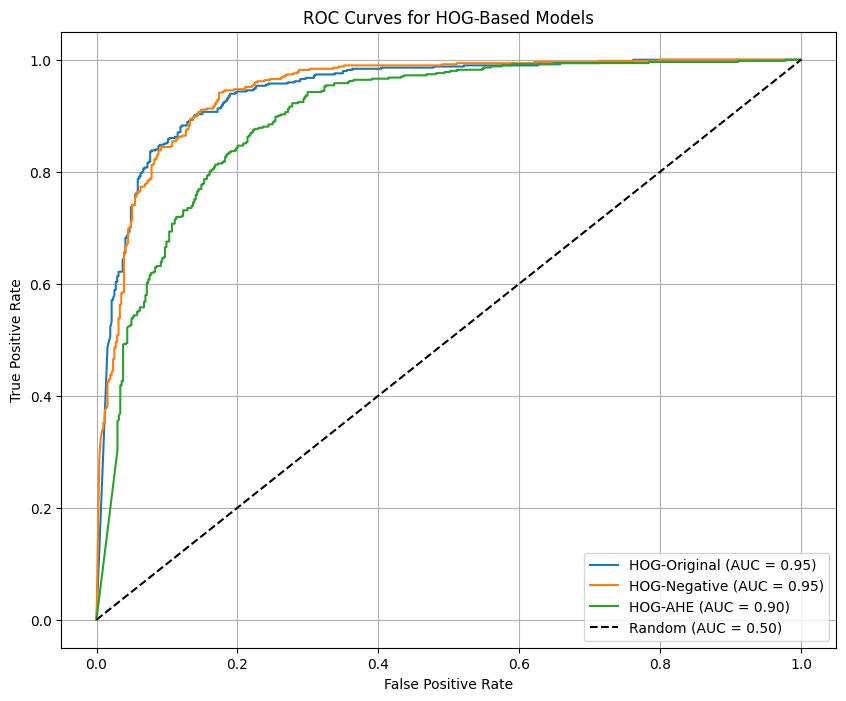

AUC for HOG-Original: 0.9484
AUC for HOG-Negative: 0.9512
AUC for HOG-AHE: 0.8987


In [94]:
# GROK 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf

# Function to get prediction probabilities and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    y_true = []
    y_scores = []
    for images, labels in dataset:
        # Get model prediction probabilities
        predictions = model.predict(images, verbose=0)
        # Extract probability for the positive class (malignant, label 1)
        y_scores.extend(predictions[:, 1])
        # Convert one-hot encoded labels to binary (0 for benign, 1 for malignant)
        y_true.extend(np.argmax(labels.numpy(), axis=1))
    return np.array(y_true), np.array(y_scores)

# Define datasets and models
datasets = {
    'HOG-Original': testHOG_original_dataset,
    'HOG-Negative': testHOG_Neg_dataset,
    'HOG-AHE': testHOG_AHE_dataset
}
models = {
    'HOG-Original': model_HOG,
    'HOG-Negative': model_HOG_Neg,
    'HOG-AHE': model_HOG_AHE
}

# Create figure for ROC curves
plt.figure(figsize=(10, 8))

# Generate ROC curves and AUC for each model
for name, dataset in datasets.items():
    model = models[name]
    # Get true labels and prediction probabilities
    y_true, y_scores = get_predictions_and_labels(model, dataset)
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores, pos_label=1)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for HOG-Based Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC scores
for name, dataset in datasets.items():
    model = models[name]
    y_true, y_scores = get_predictions_and_labels(model, dataset)
    fpr, tpr, _ = roc_curve(y_true, y_scores, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print(f"AUC for {name}: {roc_auc:.4f}")

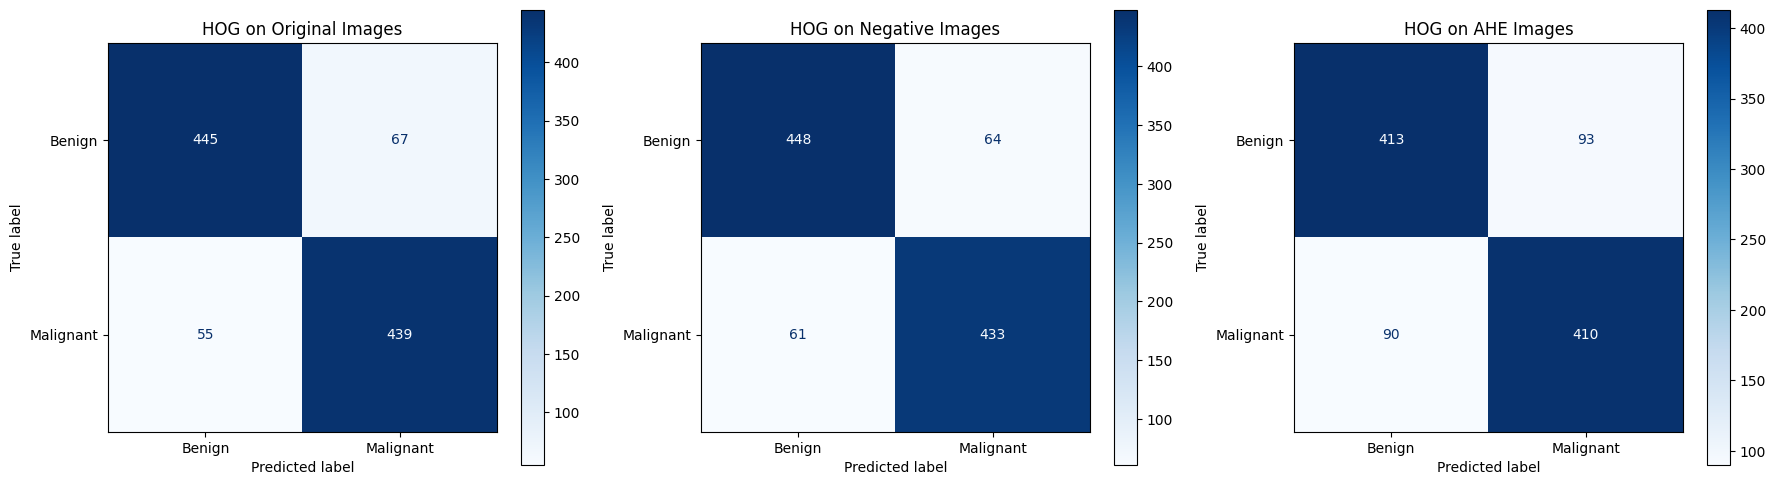


Original Performance:
True Negatives (Correct Benign): 445
False Positives (Benign misclassified as Malignant): 67
False Negatives (Malignant misclassified as Benign): 55
True Positives (Correct Malignant): 439
Sensitivity (Recall): 0.8887
Specificity: 0.8691
Precision: 0.8676

Negative Transform Performance:
True Negatives (Correct Benign): 448
False Positives (Benign misclassified as Malignant): 64
False Negatives (Malignant misclassified as Benign): 61
True Positives (Correct Malignant): 433
Sensitivity (Recall): 0.8765
Specificity: 0.8750
Precision: 0.8712

AHE Performance:
True Negatives (Correct Benign): 413
False Positives (Benign misclassified as Malignant): 93
False Negatives (Malignant misclassified as Benign): 90
True Positives (Correct Malignant): 410
Sensitivity (Recall): 0.8200
Specificity: 0.8162
Precision: 0.8151


In [88]:
# Deepseek 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Get true labels and predictions from test dataset
def get_labels_and_predictions(model, test_dataset):
    y_true = []
    y_pred = []
    
    # Iterate through batches in test dataset
    for images, labels in test_dataset:
        # Get model predictions (probabilities)
        preds = model.predict(images, verbose=0)
        # Convert one-hot encoded labels back to class indices
        true_class = np.argmax(labels.numpy(), axis=1)
        pred_class = np.argmax(preds, axis=1)
        
        y_true.extend(true_class)
        y_pred.extend(pred_class)
    
    return np.array(y_true), np.array(y_pred)

# 2. Generate predictions for each model
y_true_original, y_pred_original = get_labels_and_predictions(model_HOG, testHOG_original_dataset)
y_true_neg, y_pred_neg = get_labels_and_predictions(model_HOG_Neg, testHOG_Neg_dataset)
y_true_ahe, y_pred_ahe = get_labels_and_predictions(model_HOG_AHE, testHOG_AHE_dataset)

# 3. Create confusion matrices
cm_original = confusion_matrix(y_true_original, y_pred_original)
cm_neg = confusion_matrix(y_true_neg, y_pred_neg)
cm_ahe = confusion_matrix(y_true_ahe, y_pred_ahe)

# 4. Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original Images
disp_original = ConfusionMatrixDisplay(confusion_matrix=cm_original, 
                                     display_labels=['Benign', 'Malignant'])
disp_original.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('HOG on Original Images')

# Negative Transform
disp_neg = ConfusionMatrixDisplay(confusion_matrix=cm_neg, 
                                display_labels=['Benign', 'Malignant'])
disp_neg.plot(ax=axes[1], cmap='Blues')
axes[1].set_title('HOG on Negative Images')

# AHE Images
disp_ahe = ConfusionMatrixDisplay(confusion_matrix=cm_ahe, 
                                display_labels=['Benign', 'Malignant'])
disp_ahe.plot(ax=axes[2], cmap='Blues')
axes[2].set_title('HOG on AHE Images')

plt.tight_layout()
plt.show()

# 5. Print numerical results
def print_metrics(y_true, y_pred, name):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(f"\n{name} Performance:")
    print(f"True Negatives (Correct Benign): {tn}")
    print(f"False Positives (Benign misclassified as Malignant): {fp}")
    print(f"False Negatives (Malignant misclassified as Benign): {fn}")
    print(f"True Positives (Correct Malignant): {tp}")
    print(f"Sensitivity (Recall): {tp/(tp+fn):.4f}")
    print(f"Specificity: {tn/(tn+fp):.4f}")
    print(f"Precision: {tp/(tp+fp):.4f}")

print_metrics(y_true_original, y_pred_original, "Original")
print_metrics(y_true_neg, y_pred_neg, "Negative Transform")
print_metrics(y_true_ahe, y_pred_ahe, "AHE")

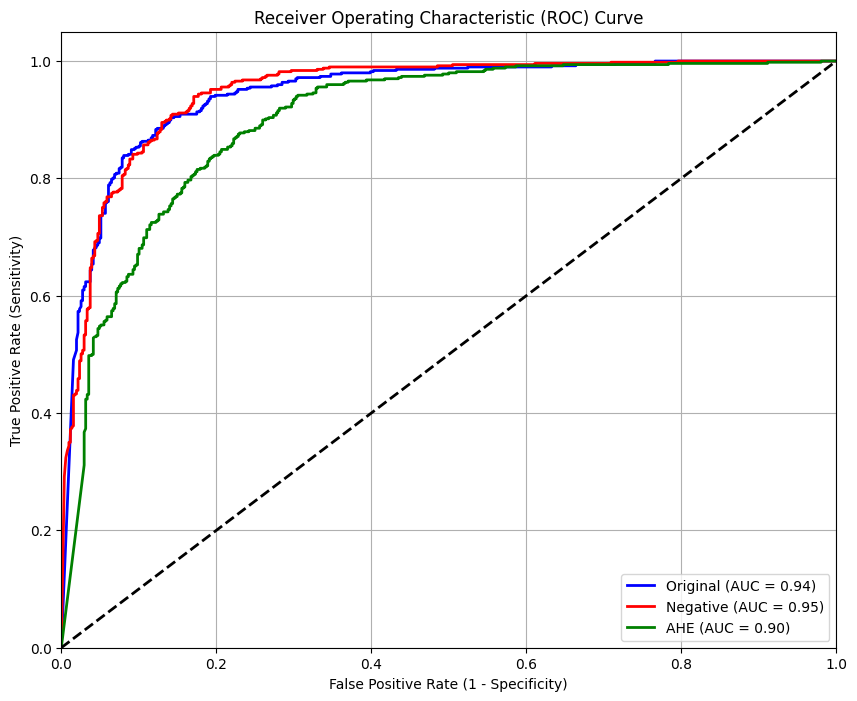

Original HOG AUC: 0.9446
Negative HOG AUC: 0.9478
AHE HOG AUC: 0.8999


In [96]:
# DeepSeek 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# 1. Function to get prediction probabilities and true labels
def get_probabilities_and_labels(model, test_dataset):
    y_true = []
    y_probs = []
    
    for images, labels in test_dataset:
        # Get model predictions (probabilities)
        probas = model.predict(images, verbose=0)
        # Store true labels (already one-hot encoded)
        y_true.extend(labels.numpy())
        # Store probabilities for malignant class (class 1)
        y_probs.extend(probas[:, 1])  # Probability of malignant class
    
    return np.array(y_true), np.array(y_probs)

# 2. Get probabilities for each model
y_true_orig, y_probs_orig = get_probabilities_and_labels(model_HOG, testHOG_original_dataset)
y_true_neg, y_probs_neg = get_probabilities_and_labels(model_HOG_Neg, testHOG_Neg_dataset)
y_true_ahe, y_probs_ahe = get_probabilities_and_labels(model_HOG_AHE, testHOG_AHE_dataset)

# 3. Compute ROC curve and AUC for each model
fpr_orig, tpr_orig, _ = roc_curve(y_true_orig[:, 1], y_probs_orig)
roc_auc_orig = auc(fpr_orig, tpr_orig)

fpr_neg, tpr_neg, _ = roc_curve(y_true_neg[:, 1], y_probs_neg)
roc_auc_neg = auc(fpr_neg, tpr_neg)

fpr_ahe, tpr_ahe, _ = roc_curve(y_true_ahe[:, 1], y_probs_ahe)
roc_auc_ahe = auc(fpr_ahe, tpr_ahe)

# 4. Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
models = ['Original (AUC = %0.2f)', 'Negative (AUC = %0.2f)', 'AHE (AUC = %0.2f)']
results = [(fpr_orig, tpr_orig, roc_auc_orig), 
           (fpr_neg, tpr_neg, roc_auc_neg),
           (fpr_ahe, tpr_ahe, roc_auc_ahe)]

for color, (fpr, tpr, roc_auc), label in zip(colors, results, models):
    plt.plot(fpr, tpr, color=color, lw=2,
             label=label % roc_auc)



# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# 5. Print AUC values
print(f"Original HOG AUC: {roc_auc_orig:.4f}")
print(f"Negative HOG AUC: {roc_auc_neg:.4f}")
print(f"AHE HOG AUC: {roc_auc_ahe:.4f}")

# ROC-AUC Curves for The Original HOG Model 


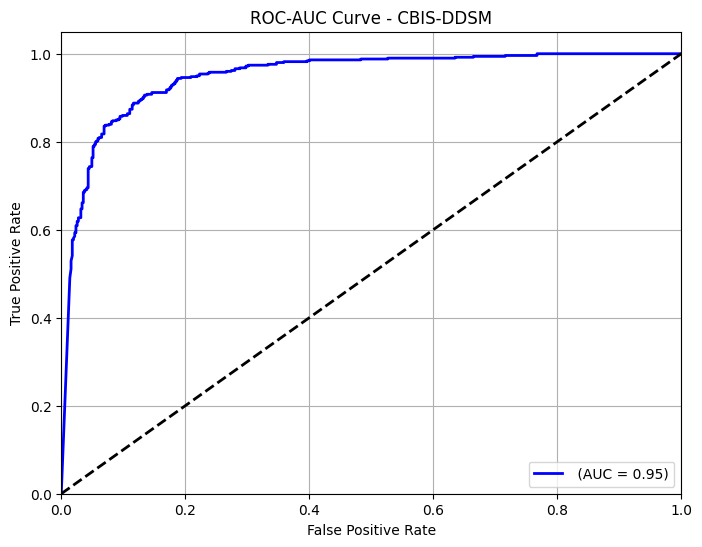

AUC: 0.9490


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to get prediction probabilities and true labels
def get_probabilities_and_labels(model, test_dataset):
    y_true = []
    y_probs = []
    
    for images, labels in test_dataset:
        # Get model predictions (probabilities)
        probas = model.predict(images, verbose=0)
        # Store true labels (already one-hot encoded)
        y_true.extend(labels.numpy())
        # Store probabilities for malignant class (class 1)
        y_probs.extend(probas[:, 1])  # Probability of malignant class
    
    return np.array(y_true), np.array(y_probs)

# Get probabilities for original HOG model
y_true_orig, y_probs_orig = get_probabilities_and_labels(model_HOG, testHOG_original_dataset)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_orig[:, 1], y_probs_orig)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, 
         label=f' (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - Specificity)')
plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate (Sensitivity)')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - CBIS-DDSM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC: {roc_auc:.4f}")